In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats

In [2]:
ATP50 = pd.read_csv('spd_stdATP50.csv', names=['spd','std'])
ATP100 = pd.read_csv('spd_stdATP100.csv', names=['spd','std'])
ATP200 = pd.read_csv('spd_stdATP200.csv', names=['spd','std'])
ATP300 = pd.read_csv('spd_stdATP300.csv', names=['spd','std'])
ATP400 = pd.read_csv('spd_stdATP400.csv', names=['spd','std'])
ATP500 = pd.read_csv('spd_stdATP500.csv', names=['spd','std'])

ATP50_2 = pd.read_csv('spd_std273ATP50.csv', names=['spd','std'])
ATP100_2 = pd.read_csv('spd_std273ATP100.csv', names=['spd','std'])
ATP200_2 = pd.read_csv('spd_std273ATP200.csv', names=['spd','std'])
ATP300_2 = pd.read_csv('spd_std273ATP300.csv', names=['spd','std'])
#ATP400_2 = pd.read_csv('spd_std273ATP400.csv', names=['spd','std'])
#ATP500_2 = pd.read_csv('spd_std273ATP500.csv', names=['spd','std'])

x = np.array([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])

simTym = np.linspace(0,5,50)
simTym2 = np.round(np.linspace(0,5,501),2)

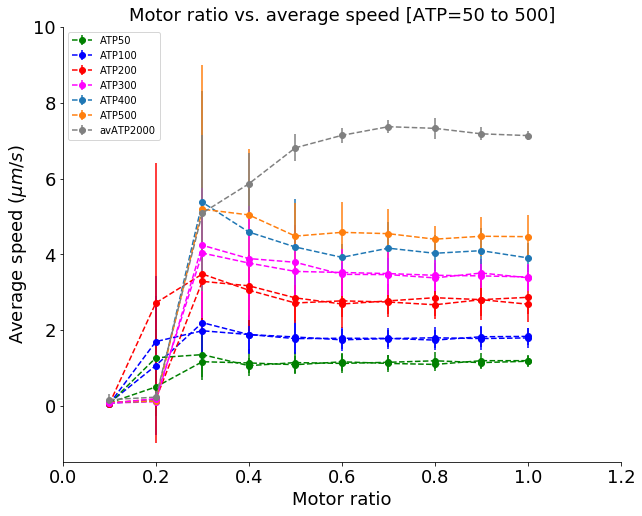

In [3]:
fig, ax = plt.subplots(figsize=(10,8))

ax.errorbar(x,ATP50['spd'],yerr=ATP50['std'], label='ATP50', linestyle='--', marker='o', color='green')
ax.errorbar(x,ATP100['spd'],yerr=ATP100['std'], label='ATP100', linestyle='--', marker='o', color='blue')
ax.errorbar(x,ATP200['spd'],yerr=ATP200['std'], label='ATP200', linestyle='--', marker='o', color='red')
ax.errorbar(x,ATP300['spd'],yerr=ATP300['std'], label='ATP300', linestyle='--', marker='o', color='magenta')
ax.errorbar(x,ATP400['spd'],yerr=ATP400['std'], label='ATP400', linestyle='--', marker='o')
ax.errorbar(x,ATP500['spd'],yerr=ATP500['std'], label='ATP500', linestyle='--', marker='o')

ax.errorbar(x,ATP50_2['spd'],yerr=ATP50_2['std'], label='', linestyle='--', marker='o', color='green')
ax.errorbar(x,ATP100_2['spd'],yerr=ATP100_2['std'], label='', linestyle='--', marker='o', color='blue')
ax.errorbar(x,ATP200_2['spd'],yerr=ATP200_2['std'], label='', linestyle='--', marker='o', color='red')
ax.errorbar(x,ATP300_2['spd'],yerr=ATP300_2['std'], label='', linestyle='--', marker='o', color='magenta')
#plt.errorbar(x,ATP400_2['spd'],yerr=ATP400_2['std'], label='ATP400', linestyle='--', marker='o')
#plt.errorbar(x,ATP500_2['spd'],yerr=ATP500_2['std'], label='ATP500', linestyle='--', marker='o')

oldATP = np.loadtxt('sz10.txt')
sdOld = np.loadtxt('sd10.txt')
ax.errorbar(x,oldATP,sdOld, label='avATP2000', linestyle='--', marker='o', color='grey')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.set_xticks(np.arange(0,1.3,step=0.2))
ax.set_yticks(np.arange(0,11,step=2))
ax.tick_params(labelsize=18)

ax.set_title('Motor ratio vs. average speed [ATP=50 to 500]', fontsize=18)
ax.set_xlabel('Motor ratio', fontsize=18)
ax.set_ylabel('Average speed ($\mu m/s$)', fontsize=18)
ax.legend(loc='best')
#ax.grid()

plt.savefig('lowATP50to500.svg',fmt='svg',dpi=3000, bbox_inches='tight')

plt.show()

In [4]:
ATP50['spd'][:-1]

0    0.085442
1    0.503023
2    1.168500
3    1.136375
4    1.090395
5    1.166055
6    1.124180
7    1.097597
8    1.195815
Name: spd, dtype: float64

In [5]:
ATP50['spd'][ATP50.index[-1]]

1.1964652830954678

In [6]:
ATPspd1 = np.array([ATP50['spd'][8],ATP100['spd'][8],ATP200['spd'][8],ATP300['spd'][8],ATP400['spd'][8],ATP500['spd'][8]])
ATPspd2 = np.array([ATP50_2['spd'][8],ATP100_2['spd'][8],ATP200_2['spd'][8],ATP300_2['spd'][8]])#,ATP400['spd'][8],ATP500['spd'][8]])
ATP = np.array([50,100,200,300,400,500])

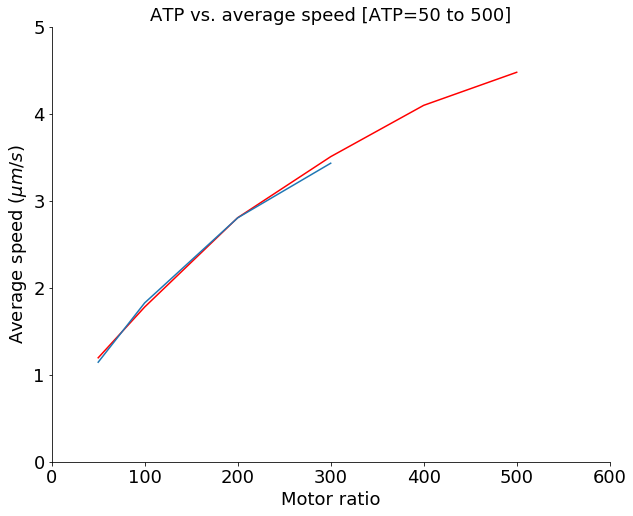

In [7]:
fig, ax = plt.subplots(figsize=(10,8))

plt.plot(ATP,ATPspd1, color='red')
plt.plot(ATP[:-2],ATPspd2)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.set_xticks(np.arange(0,600.1,step=100))
ax.set_yticks(np.arange(0,6,step=1))
ax.tick_params(labelsize=18)

ax.set_title('ATP vs. average speed [ATP=50 to 500]', fontsize=18)
ax.set_xlabel('Motor ratio', fontsize=18)
ax.set_ylabel('Average speed ($\mu m/s$)', fontsize=18)
#ax.legend(loc='best')
#ax.grid()

plt.savefig('micFitATP50to500.svg',fmt='svg',dpi=3000, bbox_inches='tight')

plt.show()

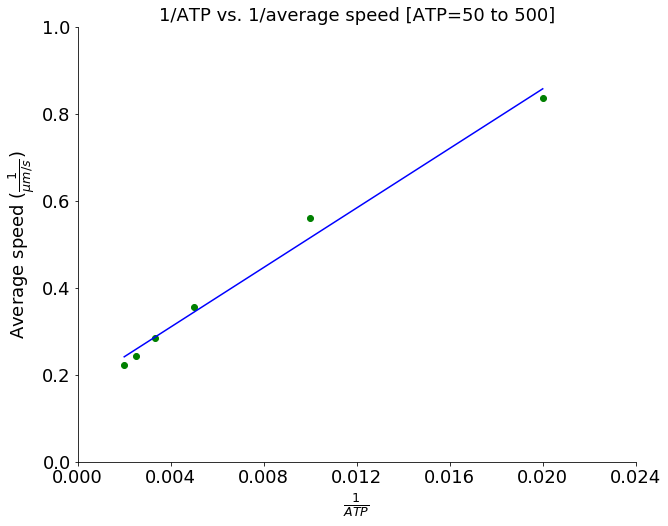

In [8]:
fig, ax = plt.subplots(figsize=(10,8))

#from scipy.interpolate import interp1d

xx = 1/ATP; yy = 1/ATPspd1

#f = interp1d(xx,yy,kind='cubic')

slope, intercept, r_value, p_value, std_err = stats.linregress(xx,yy)

#zz = np.polyfit(xx,yy,1)
#f = np.poly1d(zz)

plt.plot(xx,yy,'go')
plt.plot(xx,(slope*xx+intercept), color='blue')
#plt.plot((0,max(xx)), (f(0),f(max(x))), 'r' )

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.set_xticks(np.arange(0,0.0241,step=0.004))
ax.set_yticks(np.arange(0,1.1,step=0.2))
ax.tick_params(labelsize=18)

ax.set_title('1/ATP vs. 1/average speed [ATP=50 to 500]', fontsize=18)
ax.set_xlabel(r'$\frac{1}{ATP}$', fontsize=18)
ax.set_ylabel(r'Average speed ($\frac{1}{\mu m/s}$)', fontsize=18)
#ax.legend(loc='best')
#ax.grid()

plt.savefig('micInvFitATP50to500.svg',fmt='svg',dpi=3000, bbox_inches='tight')

plt.show()


In [9]:
np.max(ATPspd1)

4.478417391523396

In [83]:
1/intercept

5.767543406430247

In [84]:
-intercept/slope

-0.005064458627823233

In [86]:
slope/intercept

197.45447114646734

In [11]:
np.mean(ATPspd1)

2.9778875388575674

## Filament 1, ATP 50, R = 0.1 to 1.0

In [12]:
#data for filament of random number 673, ATP50, from R0.1 to R1.0 simulated date 12-12-2019
bm673 = []; r = 0.1 #Data in PC6

for j in range(10):
    bm673R = pd.read_csv('bm_no673ATP50R'+str(np.round(r,1))+'.csv', names=['bm'])
    bm673R = bm673R['bm'].T
    bm673.append(bm673R)
    r = r+0.1
bm673 = np.array(bm673)

In [13]:
bm673ac = []; r = 0.1 #Active motors

for j in range(10):
    bm673Rac = pd.read_csv('AbM673ATP50R'+str(np.round(r,1))+'.csv', names=['bm'])
    bm673Rac = bm673Rac['bm'].T
    bm673ac.append(bm673Rac)
    r = r+0.1
bm673ac = np.array(bm673ac)

In [14]:
AF673a = []; AF673 = []; r = 0.1

for j in range(10):
    AF673R = pd.read_csv('TipXY'+str(np.round(r,1))+'seed673ATP50.txt', names=['t', 'x', 'y'], delim_whitespace=True)
    AF673all = AF673R.drop(['t'], axis=1) # we don't need 't'. NB: dt = 0.01*1 = 0.01 sec
    AF673R = AF673all.iloc[0::10, :] #pick every 9th row starting from the first. Here dt = 0.01*10 = 0.1
    AF673a.append(AF673all); AF673.append(AF673R)
    r = r+0.1


/home/nitta/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


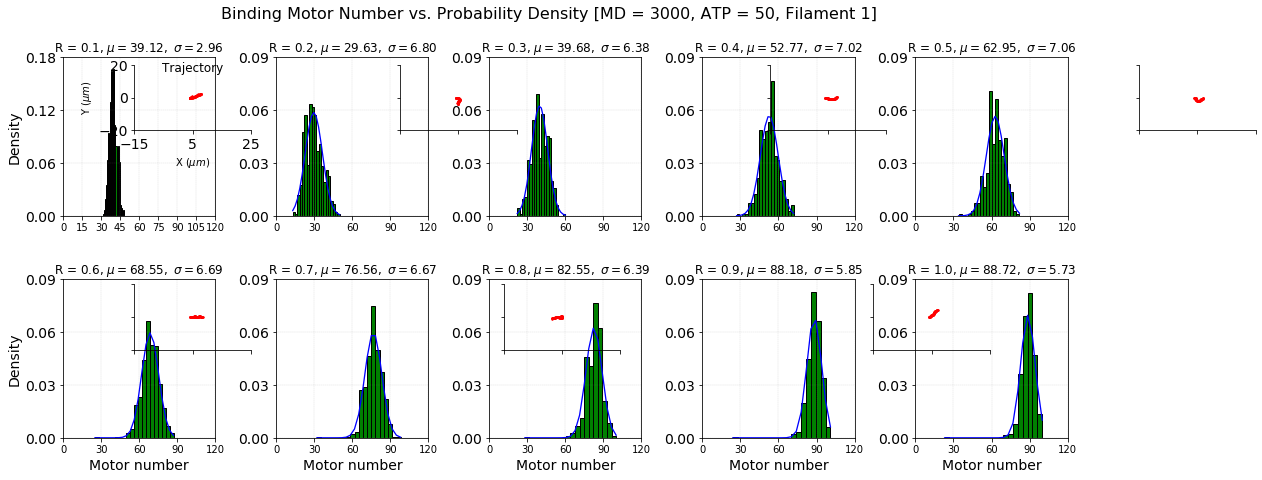

In [15]:

fig = plt.figure(figsize=(18, 7))
left,bottom,width,height= 0.18, 0.735, 0.09, 0.13

plt.suptitle('Binding Motor Number vs. Probability Density [MD = 3000, ATP = 50, Filament 1]', fontsize=16)

plt.subplots_adjust(wspace=0.4)
plt.subplots_adjust(hspace=0.4)

byn = 20; r = 0.1
Nleft = 0.205; Nleft2 = 0.0

for i in range(0,10):
    fig.add_subplot(2,5,1+i)
    (mu,sigma)=norm.fit(bm673[i])
    n,bins,patches = plt.hist(bm673[i],byn, density=True, alpha=1,histtype='bar',ec='black',color='green')
    plt.title(r'R = %.1f, $\mu=%.2f,\ \sigma=%.2f$' %(r, mu, sigma))
    plt.grid(color='gray',which='both',linestyle=':',linewidth=0.25)
    if i>0:
        plt.plot(bins,1/(sigma*np.sqrt(2*np.pi))*np.exp(-(bins-mu)**2/(2*sigma**2)),'b-',lw=1.3)
        plt.yticks(np.arange(0,0.1,step=0.03), fontsize=14)
        plt.xticks(np.arange(0,121,step=30))
    elif i<3 and i>0:
        plt.yticks(np.arange(0,2.1,step=0.4), fontsize=14)
        plt.xticks(np.arange(0,31,step=5))
    elif i<1:
        plt.yticks(np.arange(0,0.2,step=0.06), fontsize=14)
        plt.xticks(np.arange(0,121,step=15))
    if i==0 or i==5:
        plt.ylabel('Density', fontsize=14)
    if i>4:
        plt.xlabel('Motor number', fontsize=14)
    if i<3:
        ax0 = fig.add_axes([0.18,bottom,width,height], facecolor='none')
        ax0.plot(AF673[i]['x'],AF673[i]['y'], label='Leading tip', color='red', marker='.', linestyle='-', linewidth=0.5, markersize=3)
        ax0.spines['right'].set_visible(False)
        ax0.spines['top'].set_visible(False)
        ax0.xaxis.set_ticks_position('bottom')
        ax0.yaxis.set_ticks_position('left')
        plt.xticks(np.arange(-15,26,step=20),fontsize=14)
        plt.yticks(np.arange(-20,26,step=20),fontsize=14)
        plt.ylabel('Y ($\mu m$)')
        plt.xlabel('X ($\mu m$)')
        plt.title('Trajectory', y=0.8)
    if i>2 and i<6:
        ax1 = fig.add_axes([left+Nleft,bottom,width,height], facecolor='none')
        ax1.plot(AF673[i]['x'],AF673[i]['y'], label='Leading tip', color='red', marker='.', linestyle='-', linewidth=0.5, markersize=3)
        ax1.spines['right'].set_visible(False)
        ax1.spines['top'].set_visible(False)
        ax1.xaxis.set_ticks_position('bottom')
        ax1.yaxis.set_ticks_position('left')
        ax1.set_yticklabels([])
        ax1.set_xticklabels([])
        plt.xticks(np.arange(-15,26,step=20),fontsize=14)
        plt.yticks(np.arange(-20,26,step=20),fontsize=14)
        Nleft = Nleft+0.285
    if i>6:
        bottom=0.3
        ax2 = fig.add_axes([left+Nleft2,bottom,width,height], facecolor='none')
        ax2.plot(AF673[i]['x'],AF673[i]['y'], label='Leading tip', color='red', marker='.', linestyle='-', linewidth=0.5, markersize=3)
        ax2.spines['right'].set_visible(False)
        ax2.spines['top'].set_visible(False)
        ax2.xaxis.set_ticks_position('bottom')
        ax2.yaxis.set_ticks_position('left')
        ax2.set_yticklabels([])
        ax2.set_xticklabels([])
        plt.xticks(np.arange(-15,26,step=20),fontsize=14)
        plt.yticks(np.arange(-20,26,step=20),fontsize=14)
        Nleft2 = Nleft2+0.285
    r = r+0.1
    
#plt.savefig('bmHist673x.svg',fmt='svg',dpi=3000, bbox_inches='tight')

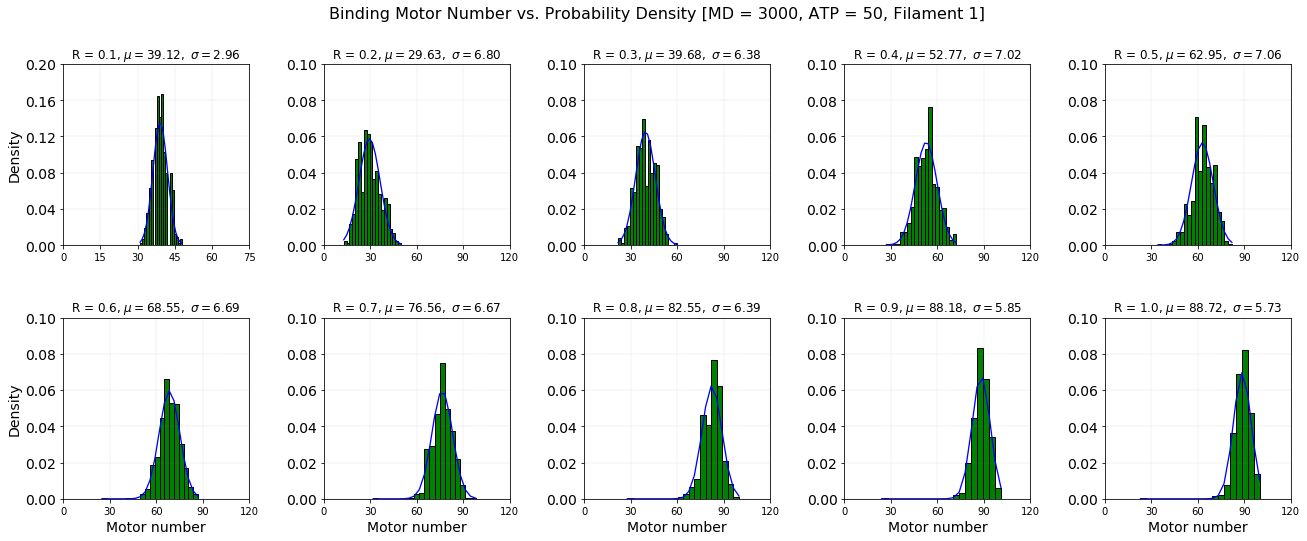

In [16]:
plt.figure(figsize=(22,8))
plt.axis('tight')
plt.suptitle('Binding Motor Number vs. Probability Density [MD = 3000, ATP = 50, Filament 1]', fontsize=16)

plt.subplots_adjust(wspace=0.4)
plt.subplots_adjust(hspace=0.4)

byn = 20; r = 0.1

for i in range(0,10):
    plt.subplot(2,5,i+1)
    (mu,sigma)=norm.fit(bm673[i])
    n,bins,patches = plt.hist(bm673[i],byn, density=True, alpha=1,histtype='bar',ec='black',color='green')
    plt.title(r'R = %.1f, $\mu=%.2f,\ \sigma=%.2f$' %(r, mu, sigma))
    plt.grid(color='gray',which='both',linestyle=':',linewidth=0.25)
    if i>0:
        plt.plot(bins,1/(sigma*np.sqrt(2*np.pi))*np.exp(-(bins-mu)**2/(2*sigma**2)),'b-',lw=1.3)
        plt.yticks(np.arange(0,0.11,step=0.02), fontsize=14)
        plt.xticks(np.arange(0,121,step=30))
    #elif i<3 and i>0:
        #plt.yticks(np.arange(0,2.1,step=0.4), fontsize=14)
        #plt.xticks(np.arange(0,31,step=5))
    elif i<1:
        plt.plot(bins,1/(sigma*np.sqrt(2*np.pi))*np.exp(-(bins-mu)**2/(2*sigma**2)),'b-',lw=1.3)
        plt.yticks(np.arange(0,0.21,step=0.04), fontsize=14)
        plt.xticks(np.arange(0,90,step=15))
    if i==0 or i==5:
        plt.ylabel('Density', fontsize=14)
    if i>4:
        plt.xlabel('Motor number', fontsize=14)
    r = r+0.1
plt.savefig('bmHist673ATP50.svg',fmt='svg',dpi=3000, bbox_inches='tight')

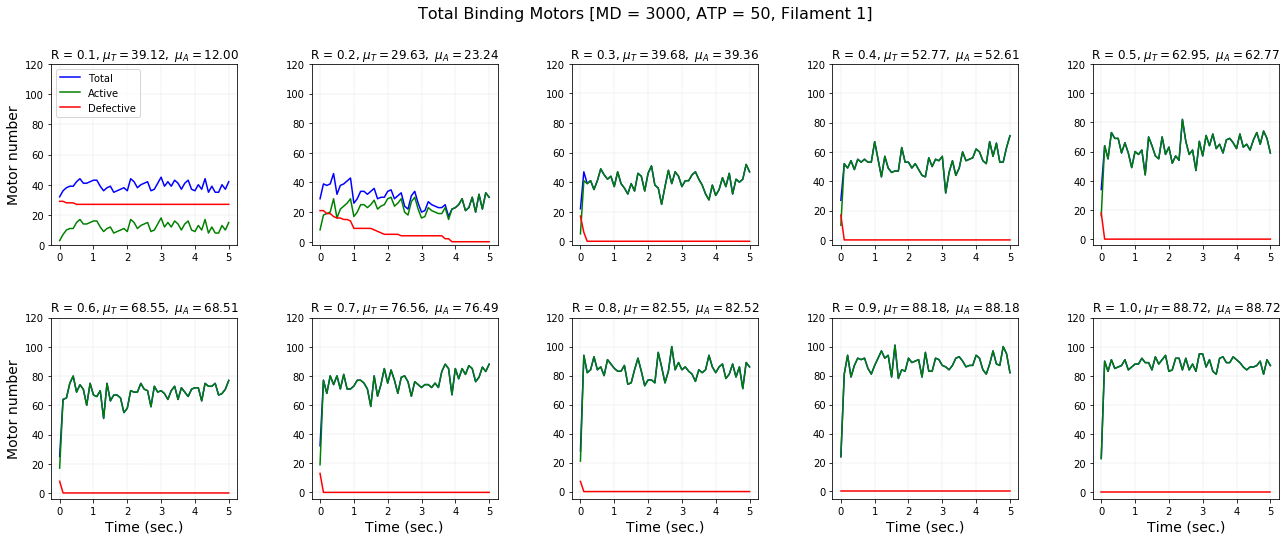

In [17]:
plt.figure(figsize=(22,8))
plt.axis('tight')
plt.suptitle('Total Binding Motors [MD = 3000, ATP = 50, Filament 1]', fontsize=16)

plt.subplots_adjust(wspace=0.4)
plt.subplots_adjust(hspace=0.4)

r = 0.1

for i in range(0,10):
    plt.subplot(2,5,i+1)
    plt.plot(simTym2[0::10],bm673[i][0::10], color='blue', label='Total')
    plt.plot(simTym2[0::10],bm673ac[i][0::10], color='green', label='Active')
    plt.plot(simTym2[0::10],(bm673[i][0::10] - bm673ac[i][0::10]), color='red', label='Defective')
    tMu = np.mean(bm673[i]); tSig = np.std(bm673[i])
    acMu = np.mean(bm673ac[i]); acSig = np.std(bm673ac[i])
    plt.title(r'R = %.1f, $\mu_T=%.2f,\ \mu_A=%.2f$' %(r, tMu, acMu))
    plt.grid(color='gray',which='both',linestyle=':',linewidth=0.25)
    plt.yticks(np.arange(0,120.1, step=20))
    if i==0:
        plt.legend(loc='upper left')
    if i==0 or i==5:
        plt.ylabel('Motor number', fontsize=14)
    if i>4:
        plt.xlabel('Time (sec.)', fontsize=14)
    r = r+0.1
plt.savefig('AllbM673ATP50.svg',fmt='svg',dpi=3000, bbox_inches='tight')

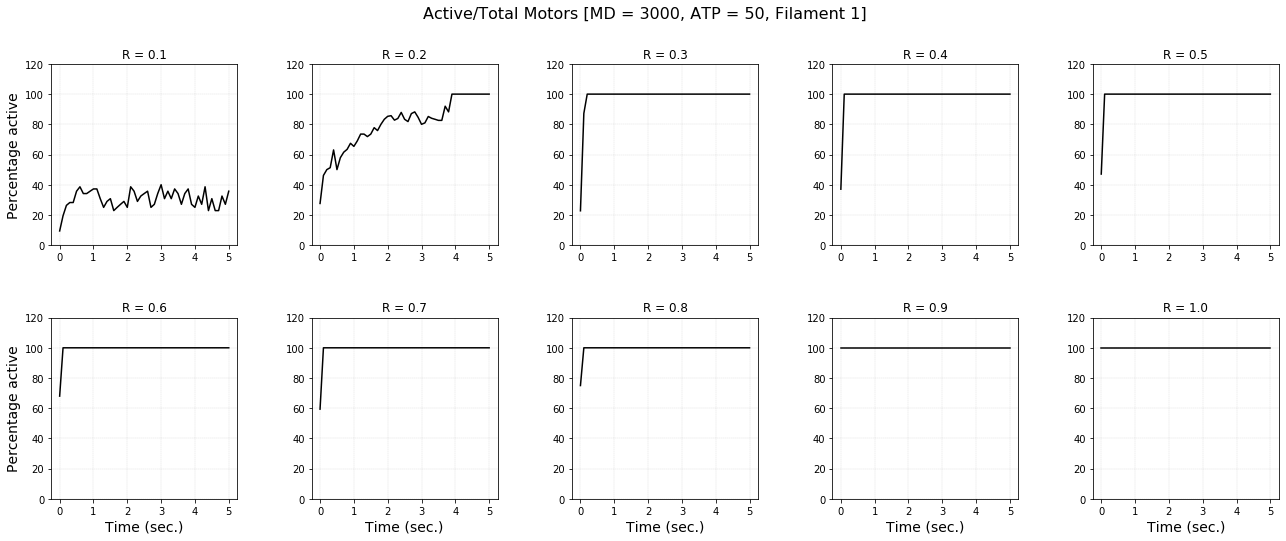

In [18]:
plt.figure(figsize=(22,8))
plt.axis('tight')
plt.suptitle('Active/Total Motors [MD = 3000, ATP = 50, Filament 1]', fontsize=16)

plt.subplots_adjust(wspace=0.4)
plt.subplots_adjust(hspace=0.4)

r = 0.1

for i in range(0,10):
    plt.subplot(2,5,i+1)
    plt.plot(simTym2[0::10],(bm673ac[i][0::10]/bm673[i][0::10])*100, color='black')
    #acMu = np.mean(bm673ac[i]); acSig = np.std(bm673ac[i])
    plt.title('R = %.1f' %(r))
    plt.grid(color='gray',which='both',linestyle=':',linewidth=0.25)
    plt.yticks(np.arange(0,120.1, step=20))
    if i==0 or i==5:
        plt.ylabel('Percentage active', fontsize=14)
    if i>4:
        plt.xlabel('Time (sec.)', fontsize=14)
    r = r+0.1
plt.savefig('FracBM673ATP50.svg',fmt='svg',dpi=3000, bbox_inches='tight')

In [19]:
print(np.where( np.array([1,5,4]) > np.array([1,3,4]) ))

(array([1]),)


In [20]:
print(np.where(bm673ac[0] > bm673[0]))

(array([], dtype=int64),)


In [21]:
bm673[0].shape

(501,)

In [22]:
bm673ac[0].shape

(501,)

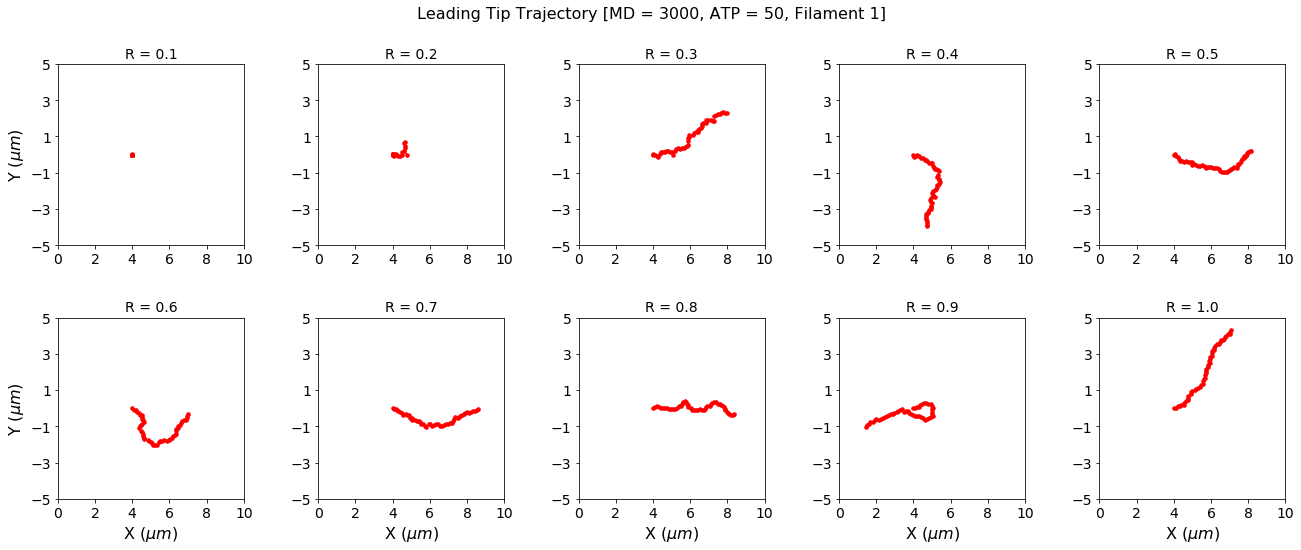

In [23]:
plt.figure(figsize=(22,8))
plt.suptitle('Leading Tip Trajectory [MD = 3000, ATP = 50, Filament 1]', fontsize=16)
plt.subplots_adjust(wspace=0.4)
plt.subplots_adjust(hspace=0.4)
plt.axes().set_aspect('equal')

r = 0.1

for i in range(0,10):
    plt.subplot(2,5,i+1)
    plt.plot(AF673[i]['x'],AF673[i]['y'], label='Leading tip', color='red', marker='.', linestyle='-', linewidth=0.5, markersize=7)
    plt.xticks(np.arange(0,11,step=2),fontsize=14)
    plt.yticks(np.arange(-5,6,step=2),fontsize=14)
    plt.title('R = %.1f'%(r), fontsize=14)
    if i==0 or i==5:
        plt.ylabel('Y ($\mu m$)', fontsize=16)
    if i>4:
        plt.xlabel('X ($\mu m$)', fontsize=16)
    r = r+0.1
plt.savefig('traj673ATP50.svg',fmt='svg',dpi=3000, bbox_inches='tight')

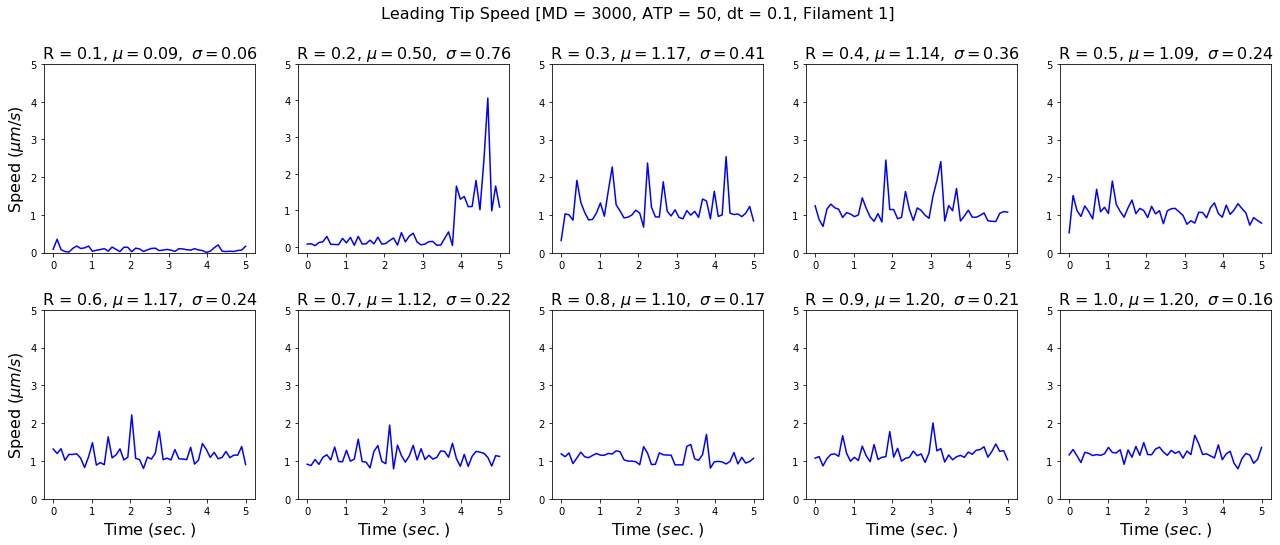

In [24]:
Dt = 0.01
r = 0.1

plt.figure(figsize=(22,8))
plt.suptitle('Leading Tip Speed [MD = 3000, ATP = 50, dt = 0.1, Filament 1]', fontsize=16)
plt.subplots_adjust(hspace=0.3)

for i in range(0,10):
    plt.subplot(2,5,i+1)
    dfVel = AF673a[i].iloc[0::10, :] #pick every 9th row starting from the first (0): dt = 0.1
    Dx_tip = np.diff(dfVel['x']); Dy_tip = np.diff(dfVel['y'])
    DD=np.sqrt((Dx_tip**2)+(Dy_tip**2))
    v=DD/(10*Dt) # use 10*Dt if you .iloc...
    
    avSpd = np.mean(v)
    stDev=np.sum(((v-avSpd)**2)/(np.size(v)-1)); stDev=np.sqrt(stDev)
    
    plt.plot(simTym,v, color='blue')
    plt.title(r'R = %.1f, $\mu=%.2f,\ \sigma=%.2f$' %(r, avSpd, stDev), fontsize=16)
    
    if i==0 or i==5:
        plt.ylabel('Speed ($\mu m/s$)', fontsize=16)
    if i>4:
        plt.xlabel('Time ($ sec. $)', fontsize=16)
    plt.yticks(np.arange(0,5.1, step=1))
    #plt.tick_params(labelsize=14)
    r += 0.1
plt.savefig('iSpd673ATP50.svg',fmt='svg',dpi=3000, bbox_inches='tight')


## Filament 1, ATP 100, R = 0.1 to 1.0

In [25]:
#data for filament of random number 673, ATP100, from R0.1 to R1.0 
bm673_100 = []; r = 0.1 #Data in PC7

for j in range(10):
    bm673a100 = pd.read_csv('bm_no673ATP100R'+str(np.round(r,1))+'.csv', names=['bm'])
    bm673a100 = bm673a100['bm'].T
    bm673_100.append(bm673a100)
    r = r+0.1
bm673_100 = np.array(bm673_100)

In [26]:
bm673_100ac = []; r = 0.1 #Active motors

for j in range(10):
    bm673_100Rac = pd.read_csv('AbM673ATP100R'+str(np.round(r,1))+'.csv', names=['bm'])
    bm673_100Rac = bm673_100Rac['bm'].T
    bm673_100ac.append(bm673_100Rac)
    r = r+0.1
bm673_100ac = np.array(bm673_100ac)

In [27]:
AF673_100a = []; AF673_100 = []; r = 0.1

for j in range(10):
    AF673a100 = pd.read_csv('TipXY'+str(np.round(r,1))+'seed673ATP100.txt', names=['t', 'x', 'y'], delim_whitespace=True)
    AF673a100all = AF673a100.drop(['t'], axis=1) # we don't need 't'. NB: dt = 0.01*1 = 0.01 sec
    AF673a100 = AF673a100all.iloc[0::10, :] #pick every 9th row starting from the first. Here dt = 0.01*10 = 0.1
    AF673_100a.append(AF673a100all); AF673_100.append(AF673a100)
    r = r+0.1

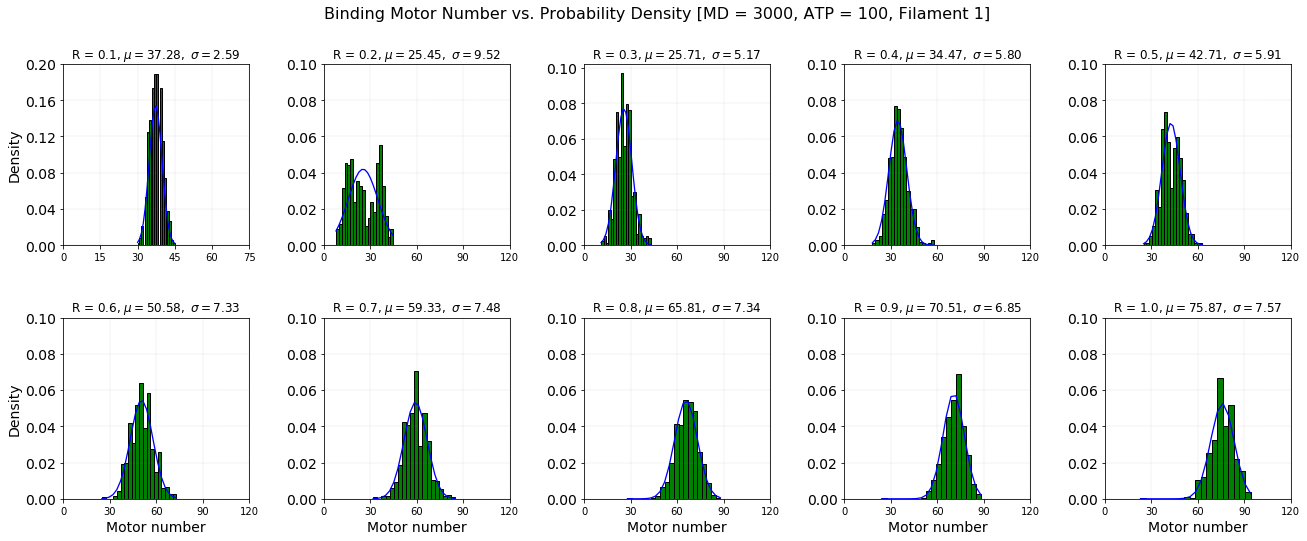

In [28]:
plt.figure(figsize=(22,8))
plt.axis('tight')
plt.suptitle('Binding Motor Number vs. Probability Density [MD = 3000, ATP = 100, Filament 1]', fontsize=16)

plt.subplots_adjust(wspace=0.4)
plt.subplots_adjust(hspace=0.4)

byn = 20; r = 0.1

for i in range(0,10):
    plt.subplot(2,5,i+1)
    (mu,sigma)=norm.fit(bm673_100[i])
    n,bins,patches = plt.hist(bm673_100[i],byn, density=True, alpha=1,histtype='bar',ec='black',color='green')
    plt.title(r'R = %.1f, $\mu=%.2f,\ \sigma=%.2f$' %(r, mu, sigma))
    plt.grid(color='gray',which='both',linestyle=':',linewidth=0.25)
    if i>0:
        plt.plot(bins,1/(sigma*np.sqrt(2*np.pi))*np.exp(-(bins-mu)**2/(2*sigma**2)),'b-',lw=1.3)
        plt.yticks(np.arange(0,0.11,step=0.02), fontsize=14)
        plt.xticks(np.arange(0,121,step=30))
    #elif i<3 and i>0:
        #plt.yticks(np.arange(0,2.1,step=0.4), fontsize=14)
        #plt.xticks(np.arange(0,31,step=5))
    elif i<1:
        plt.plot(bins,1/(sigma*np.sqrt(2*np.pi))*np.exp(-(bins-mu)**2/(2*sigma**2)),'b-',lw=1.3)
        plt.yticks(np.arange(0,0.21,step=0.04), fontsize=14)
        plt.xticks(np.arange(0,90,step=15))
    if i==0 or i==5:
        plt.ylabel('Density', fontsize=14)
    if i>4:
        plt.xlabel('Motor number', fontsize=14)
    r = r+0.1
plt.savefig('bmHist673ATP100.svg',fmt='svg',dpi=3000, bbox_inches='tight')

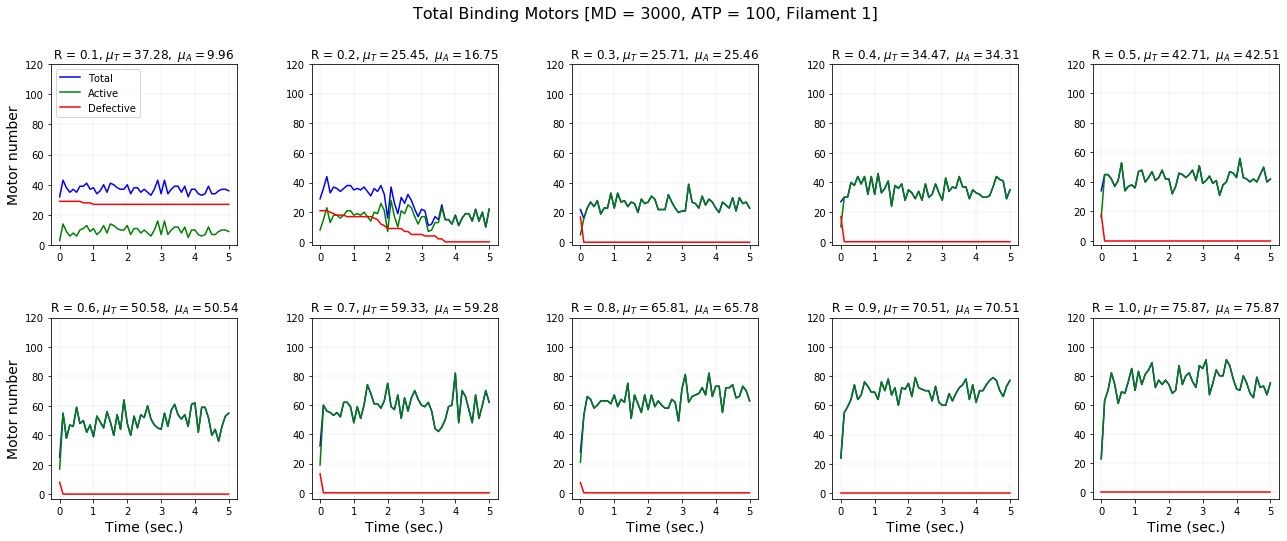

In [29]:
plt.figure(figsize=(22,8))
plt.axis('tight')
plt.suptitle('Total Binding Motors [MD = 3000, ATP = 100, Filament 1]', fontsize=16)

plt.subplots_adjust(wspace=0.4)
plt.subplots_adjust(hspace=0.4)

r = 0.1

for i in range(0,10):
    plt.subplot(2,5,i+1)
    plt.plot(simTym2[0::10],bm673_100[i][0::10], color='blue', label='Total')
    plt.plot(simTym2[0::10],bm673_100ac[i][0::10], color='green', label='Active')
    plt.plot(simTym2[0::10],(bm673_100[i][0::10] - bm673_100ac[i][0::10]), color='red', label='Defective')
    tMu = np.mean(bm673_100[i]); tSig = np.std(bm673_100[i])
    acMu = np.mean(bm673_100ac[i]); acSig = np.std(bm673_100ac[i])
    plt.title(r'R = %.1f, $\mu_T=%.2f,\ \mu_A=%.2f$' %(r, tMu, acMu))
    plt.grid(color='gray',which='both',linestyle=':',linewidth=0.25)
    plt.yticks(np.arange(0,120.1, step=20))
    if i==0:
        plt.legend(loc='upper left')
    if i==0 or i==5:
        plt.ylabel('Motor number', fontsize=14)
    if i>4:
        plt.xlabel('Time (sec.)', fontsize=14)
    r = r+0.1
plt.savefig('AllbM673ATP100.svg',fmt='svg',dpi=3000, bbox_inches='tight')

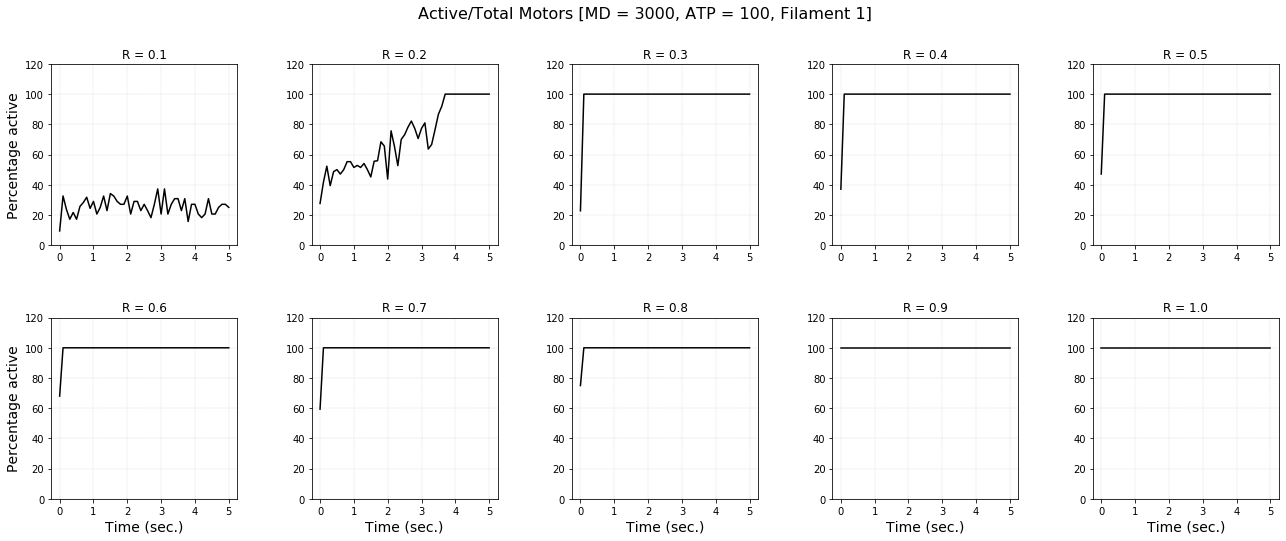

In [30]:
plt.figure(figsize=(22,8))
plt.axis('tight')
plt.suptitle('Active/Total Motors [MD = 3000, ATP = 100, Filament 1]', fontsize=16)

plt.subplots_adjust(wspace=0.4)
plt.subplots_adjust(hspace=0.4)

r = 0.1

for i in range(0,10):
    plt.subplot(2,5,i+1)
    plt.plot(simTym2[0::10],(bm673_100ac[i][0::10]/bm673_100[i][0::10])*100, color='black')
    plt.title('R = %.1f' %(r))
    plt.grid(color='gray',which='both',linestyle=':',linewidth=0.25)
    plt.yticks(np.arange(0,120.1, step=20))
    if i==0 or i==5:
        plt.ylabel('Percentage active', fontsize=14)
    if i>4:
        plt.xlabel('Time (sec.)', fontsize=14)
    r = r+0.1
plt.savefig('FracBM673ATP100.svg',fmt='svg',dpi=3000, bbox_inches='tight')

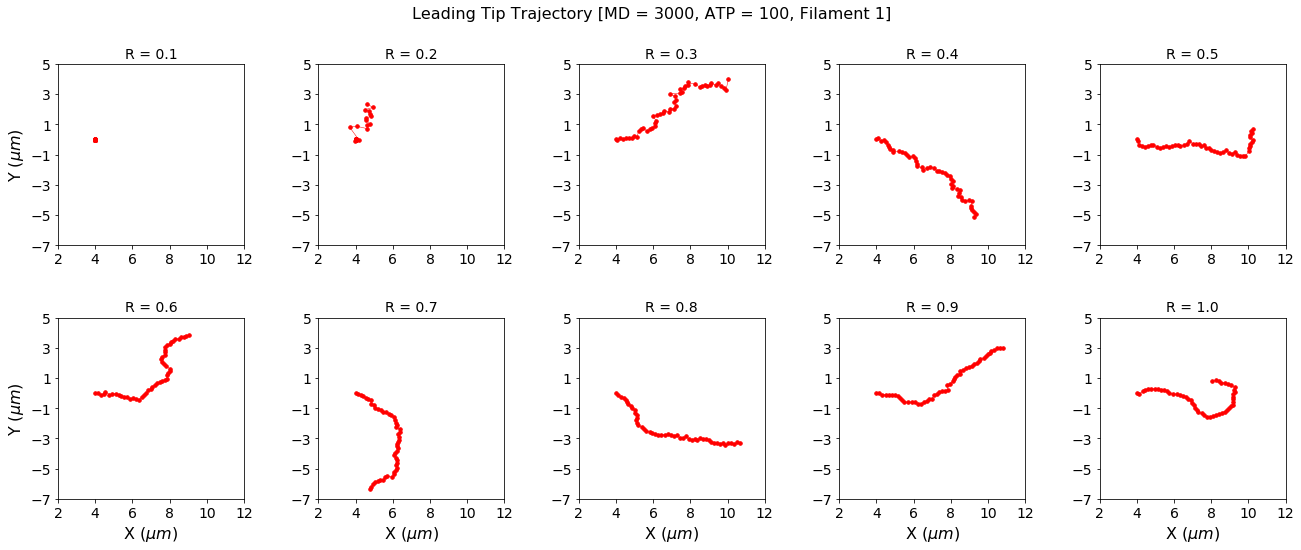

In [31]:
plt.figure(figsize=(22,8))
plt.suptitle('Leading Tip Trajectory [MD = 3000, ATP = 100, Filament 1]', fontsize=16)
plt.subplots_adjust(wspace=0.4)
plt.subplots_adjust(hspace=0.4)
plt.axes().set_aspect('equal')

r = 0.1

for i in range(0,10):
    plt.subplot(2,5,i+1)
    plt.plot(AF673_100[i]['x'],AF673_100[i]['y'], label='Leading tip', color='red', marker='.', linestyle='-', linewidth=0.5, markersize=7)
    plt.xticks(np.arange(2,13,step=2),fontsize=14)
    plt.yticks(np.arange(-7,6,step=2),fontsize=14)
    plt.title('R = %.1f'%(r), fontsize=14)
    if i==0 or i==5:
        plt.ylabel('Y ($\mu m$)', fontsize=16)
    if i>4:
        plt.xlabel('X ($\mu m$)', fontsize=16)
    r = r+0.1
plt.savefig('traj673ATP100.svg',fmt='svg',dpi=3000, bbox_inches='tight')

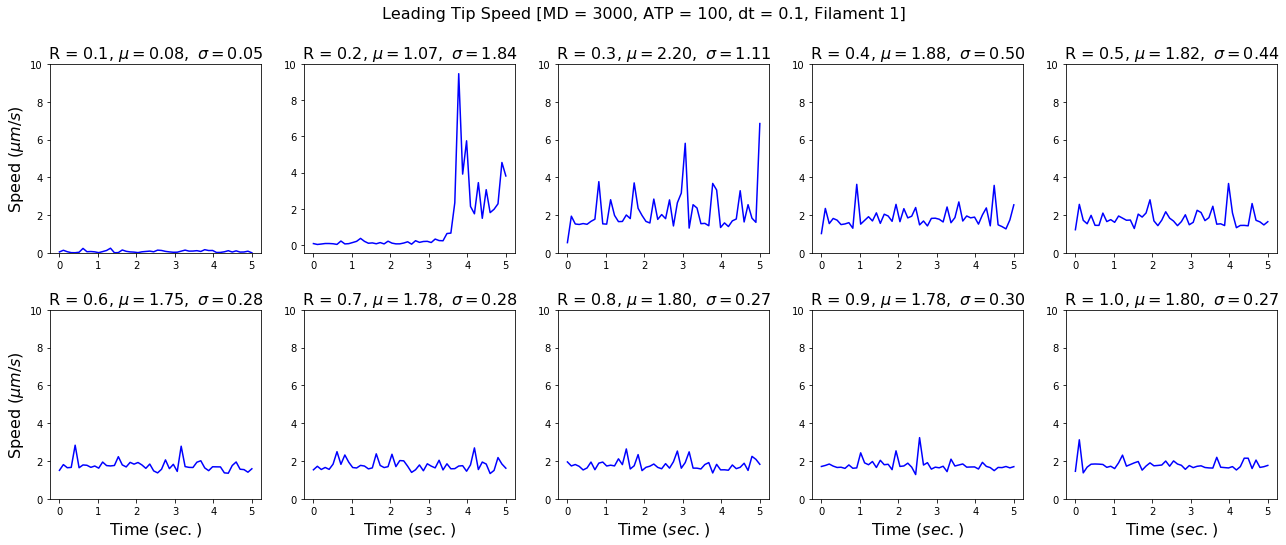

In [32]:
Dt = 0.01
r = 0.1

plt.figure(figsize=(22,8))
plt.suptitle('Leading Tip Speed [MD = 3000, ATP = 100, dt = 0.1, Filament 1]', fontsize=16)
plt.subplots_adjust(hspace=0.3)

for i in range(0,10):
    plt.subplot(2,5,i+1)
    dfVel = AF673_100a[i].iloc[0::10, :] #pick every 9th row starting from the first (0): dt = 0.1
    Dx_tip = np.diff(dfVel['x']); Dy_tip = np.diff(dfVel['y'])
    DD=np.sqrt((Dx_tip**2)+(Dy_tip**2))
    v=DD/(10*Dt) # use 10*Dt if you .iloc...
    
    avSpd = np.mean(v)
    stDev=np.sum(((v-avSpd)**2)/(np.size(v)-1)); stDev=np.sqrt(stDev)
    
    plt.plot(simTym,v, color='blue')
    plt.title(r'R = %.1f, $\mu=%.2f,\ \sigma=%.2f$' %(r, avSpd, stDev), fontsize=16)
    
    if i==0 or i==5:
        plt.ylabel('Speed ($\mu m/s$)', fontsize=16)
    if i>4:
        plt.xlabel('Time ($ sec. $)', fontsize=16)
    plt.yticks(np.arange(0,10.1, step=2))
    #plt.tick_params(labelsize=14)
    r += 0.1
plt.savefig('iSpd673ATP100.svg',fmt='svg',dpi=3000, bbox_inches='tight')


## Filament 1, ATP 200, R = 0.1 to 1.0

In [33]:
#data for filament of random number 673, ATP200, from R0.1 to R1.0
bm673_200 = []; r = 0.1 #Data in PC8

for j in range(10):
    bm673a200 = pd.read_csv('bm_no673ATP200R'+str(np.round(r,1))+'.csv', names=['bm'])
    bm673a200 = bm673a200['bm'].T
    bm673_200.append(bm673a200)
    r = r+0.1
bm673_200 = np.array(bm673_200)

In [34]:
bm673_200ac = []; r = 0.1 #Active motors

for j in range(10):
    bm673_200Rac = pd.read_csv('AbM673ATP200R'+str(np.round(r,1))+'.csv', names=['bm'])
    bm673_200Rac = bm673_200Rac['bm'].T
    bm673_200ac.append(bm673_200Rac)
    r = r+0.1
bm673_200ac = np.array(bm673_200ac)

In [35]:
AF673_200a = []; AF673_200 = []; r = 0.1

for j in range(10):
    AF673a200 = pd.read_csv('TipXY'+str(np.round(r,1))+'seed673ATP200.txt', names=['t', 'x', 'y'], delim_whitespace=True)
    AF673a200all = AF673a200.drop(['t'], axis=1) # we don't need 't'. NB: dt = 0.01*1 = 0.01 sec
    AF673a200 = AF673a200all.iloc[0::10, :] #pick every 9th row starting from the first. Here dt = 0.01*10 = 0.1
    AF673_200a.append(AF673a200all), AF673_200.append(AF673a200)
    r = r+0.1

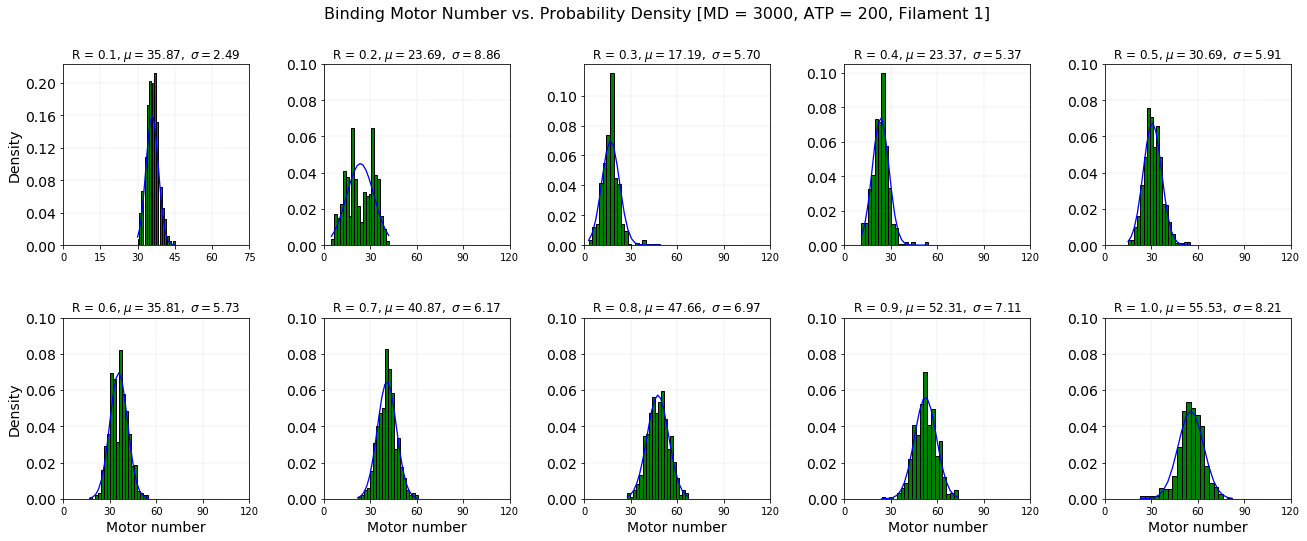

In [36]:
plt.figure(figsize=(22,8))
plt.axis('tight')
plt.suptitle('Binding Motor Number vs. Probability Density [MD = 3000, ATP = 200, Filament 1]', fontsize=16)

plt.subplots_adjust(wspace=0.4)
plt.subplots_adjust(hspace=0.4)

byn = 20; r = 0.1

for i in range(0,10):
    plt.subplot(2,5,i+1)
    (mu,sigma)=norm.fit(bm673_200[i])
    n,bins,patches = plt.hist(bm673_200[i],byn, density=True, alpha=1,histtype='bar',ec='black',color='green')
    plt.title(r'R = %.1f, $\mu=%.2f,\ \sigma=%.2f$' %(r, mu, sigma))
    plt.grid(color='gray',which='both',linestyle=':',linewidth=0.25)
    if i>0:
        plt.plot(bins,1/(sigma*np.sqrt(2*np.pi))*np.exp(-(bins-mu)**2/(2*sigma**2)),'b-',lw=1.3)
        plt.yticks(np.arange(0,0.11,step=0.02), fontsize=14)
        plt.xticks(np.arange(0,121,step=30))
    #elif i<3 and i>0:
        #plt.yticks(np.arange(0,2.1,step=0.4), fontsize=14)
        #plt.xticks(np.arange(0,31,step=5))
    elif i<1:
        plt.plot(bins,1/(sigma*np.sqrt(2*np.pi))*np.exp(-(bins-mu)**2/(2*sigma**2)),'b-',lw=1.3)
        plt.yticks(np.arange(0,0.21,step=0.04), fontsize=14)
        plt.xticks(np.arange(0,90,step=15))
    if i==0 or i==5:
        plt.ylabel('Density', fontsize=14)
    if i>4:
        plt.xlabel('Motor number', fontsize=14)
    r = r+0.1
plt.savefig('bmHist673ATP200.svg',fmt='svg',dpi=3000, bbox_inches='tight')

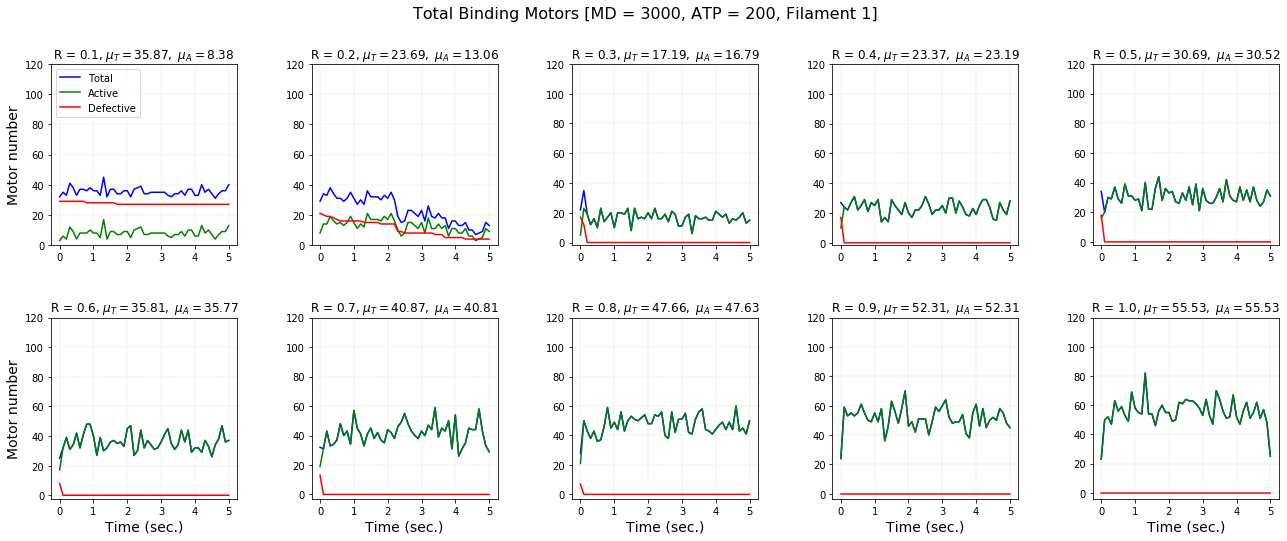

In [37]:
plt.figure(figsize=(22,8))
plt.axis('tight')
plt.suptitle('Total Binding Motors [MD = 3000, ATP = 200, Filament 1]', fontsize=16)

plt.subplots_adjust(wspace=0.4)
plt.subplots_adjust(hspace=0.4)

r = 0.1

for i in range(0,10):
    plt.subplot(2,5,i+1)
    plt.plot(simTym2[0::10],bm673_200[i][0::10], color='blue', label='Total')
    plt.plot(simTym2[0::10],bm673_200ac[i][0::10], color='green', label='Active')
    plt.plot(simTym2[0::10],(bm673_200[i][0::10] - bm673_200ac[i][0::10]), color='red', label='Defective')
    tMu = np.mean(bm673_200[i]); tSig = np.std(bm673_200[i])
    acMu = np.mean(bm673_200ac[i]); acSig = np.std(bm673_200ac[i])
    plt.title(r'R = %.1f, $\mu_T=%.2f,\ \mu_A=%.2f$' %(r, tMu, acMu))
    plt.grid(color='gray',which='both',linestyle=':',linewidth=0.25)
    plt.yticks(np.arange(0,120.1, step=20))
    if i==0:
        plt.legend(loc='upper left')
    if i==0 or i==5:
        plt.ylabel('Motor number', fontsize=14)
    if i>4:
        plt.xlabel('Time (sec.)', fontsize=14)
    r = r+0.1
plt.savefig('AllbM673ATP200.svg',fmt='svg',dpi=3000, bbox_inches='tight')

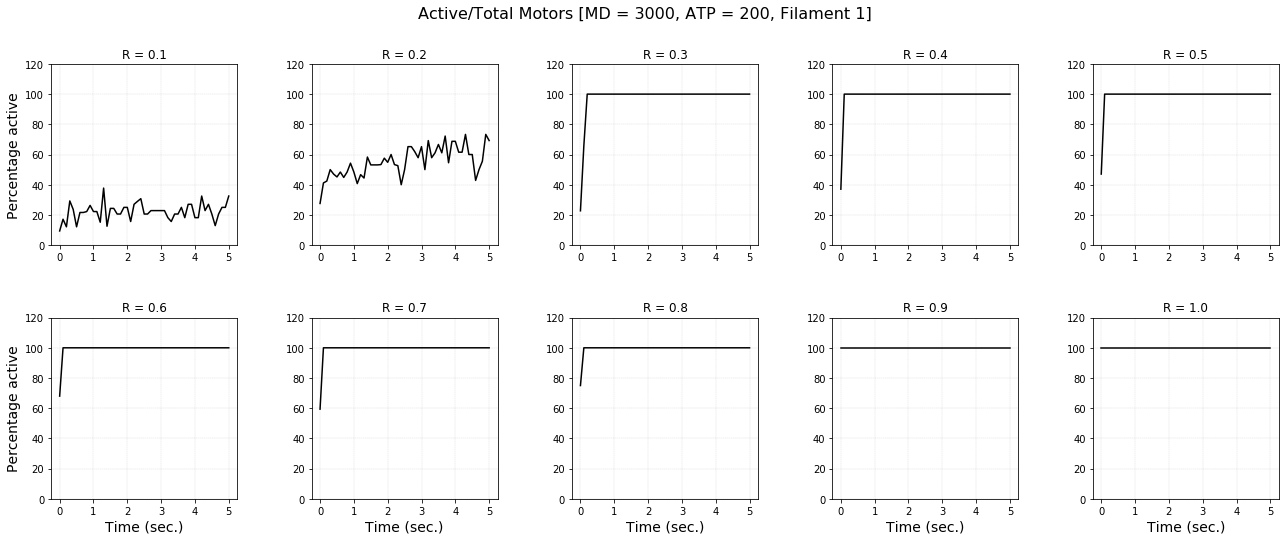

In [38]:
plt.figure(figsize=(22,8))
plt.axis('tight')
plt.suptitle('Active/Total Motors [MD = 3000, ATP = 200, Filament 1]', fontsize=16)

plt.subplots_adjust(wspace=0.4)
plt.subplots_adjust(hspace=0.4)

r = 0.1

for i in range(0,10):
    plt.subplot(2,5,i+1)
    plt.plot(simTym2[0::10],(bm673_200ac[i][0::10]/bm673_200[i][0::10])*100, color='black')
    plt.title('R = %.1f' %(r))
    plt.grid(color='gray',which='both',linestyle=':',linewidth=0.25)
    plt.yticks(np.arange(0,120.1, step=20))
    if i==0 or i==5:
        plt.ylabel('Percentage active', fontsize=14)
    if i>4:
        plt.xlabel('Time (sec.)', fontsize=14)
    r = r+0.1
plt.savefig('FracBM673ATP200.svg',fmt='svg',dpi=3000, bbox_inches='tight')

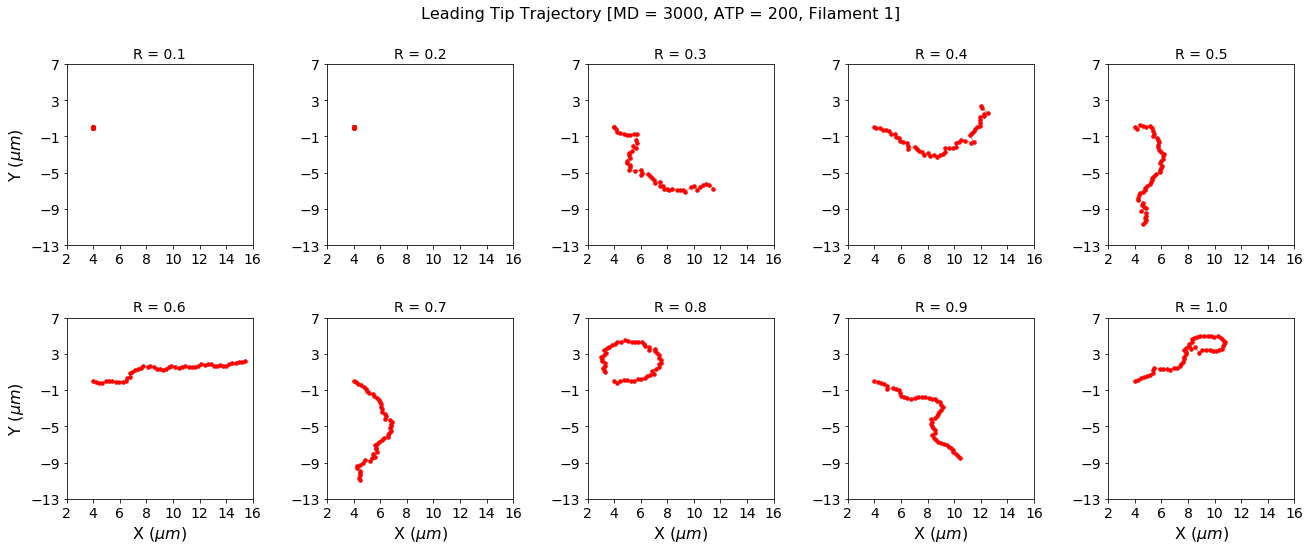

In [39]:
plt.figure(figsize=(22,8))
plt.suptitle('Leading Tip Trajectory [MD = 3000, ATP = 200, Filament 1]', fontsize=16)
plt.subplots_adjust(wspace=0.4)
plt.subplots_adjust(hspace=0.4)
plt.axes().set_aspect('equal')

r = 0.1

for i in range(0,10):
    plt.subplot(2,5,i+1)
    plt.plot(AF673_200[i]['x'],AF673_200[i]['y'], label='Leading tip', color='red', marker='.', linestyle='-', linewidth=0.5, markersize=7)
    plt.xticks(np.arange(2,17,step=2),fontsize=14)
    plt.yticks(np.arange(-13,9,step=4),fontsize=14)
    plt.title('R = %.1f'%(r), fontsize=14)
    if i==0 or i==5:
        plt.ylabel('Y ($\mu m$)', fontsize=16)
    if i>4:
        plt.xlabel('X ($\mu m$)', fontsize=16)
    r = r+0.1
plt.savefig('traj673ATP200.svg',fmt='svg',dpi=3000, bbox_inches='tight')

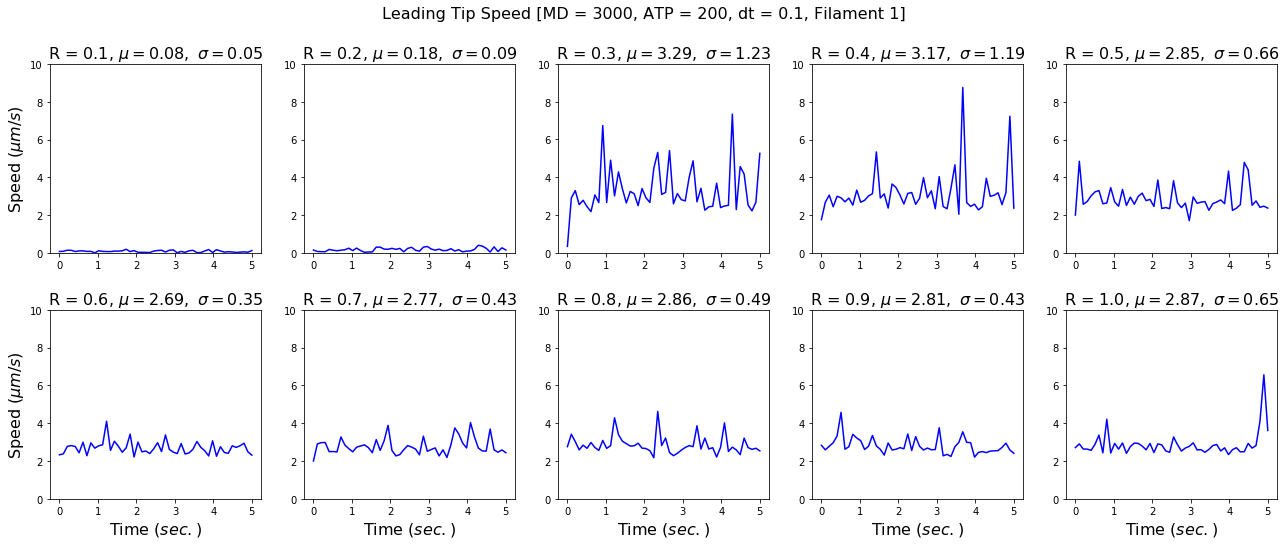

In [40]:
Dt = 0.01
r = 0.1

plt.figure(figsize=(22,8))
plt.suptitle('Leading Tip Speed [MD = 3000, ATP = 200, dt = 0.1, Filament 1]', fontsize=16)
plt.subplots_adjust(hspace=0.3)

for i in range(0,10):
    plt.subplot(2,5,i+1)
    dfVel = AF673_200a[i].iloc[0::10, :] #pick every 9th row starting from the first (0): dt = 0.1
    Dx_tip = np.diff(dfVel['x']); Dy_tip = np.diff(dfVel['y'])
    DD=np.sqrt((Dx_tip**2)+(Dy_tip**2))
    v=DD/(10*Dt) # use 10*Dt if you .iloc...
    
    avSpd = np.mean(v)
    stDev=np.sum(((v-avSpd)**2)/(np.size(v)-1)); stDev=np.sqrt(stDev)
    
    plt.plot(simTym,v, color='blue')
    plt.title(r'R = %.1f, $\mu=%.2f,\ \sigma=%.2f$' %(r, avSpd, stDev), fontsize=16)
    
    if i==0 or i==5:
        plt.ylabel('Speed ($\mu m/s$)', fontsize=16)
    if i>4:
        plt.xlabel('Time ($ sec. $)', fontsize=16)
    plt.yticks(np.arange(0,10.1, step=2))
    #plt.tick_params(labelsize=14)
    r += 0.1
plt.savefig('iSpd673ATP200.svg',fmt='svg',dpi=3000, bbox_inches='tight')


## Filament 1, ATP 300, R = 0.1 to 1.0

In [41]:
#data for filament of random number 673, ATP300, from R0.1 to R1.0
bm673_300 = []; r = 0.1 #Data in PC9

for j in range(10):
    bm673a300 = pd.read_csv('bm_no673ATP300R'+str(np.round(r,1))+'.csv', names=['bm'])
    bm673a300 = bm673a300['bm'].T
    bm673_300.append(bm673a300)
    r = r+0.1
bm673_300 = np.array(bm673_300)

In [42]:
bm673_300ac = []; r = 0.1 #Active motors

for j in range(10):
    bm673_300Rac = pd.read_csv('AbM673ATP300R'+str(np.round(r,1))+'.csv', names=['bm'])
    bm673_300Rac = bm673_300Rac['bm'].T
    bm673_300ac.append(bm673_300Rac)
    r = r+0.1
bm673_300ac = np.array(bm673_300ac)

In [43]:
AF673_300a = []; AF673_300 = []; r = 0.1

for j in range(10):
    AF673a300 = pd.read_csv('TipXY'+str(np.round(r,1))+'seed673ATP300.txt', names=['t', 'x', 'y'], delim_whitespace=True)
    AF673a300all = AF673a300.drop(['t'], axis=1) # we don't need 't'. NB: dt = 0.01*1 = 0.01 sec
    AF673a300 = AF673a300all.iloc[0::10, :] #pick every 9th row starting from the first. Here dt = 0.01*10 = 0.1
    AF673_300a.append(AF673a300all); AF673_300.append(AF673a300)
    r = r+0.1

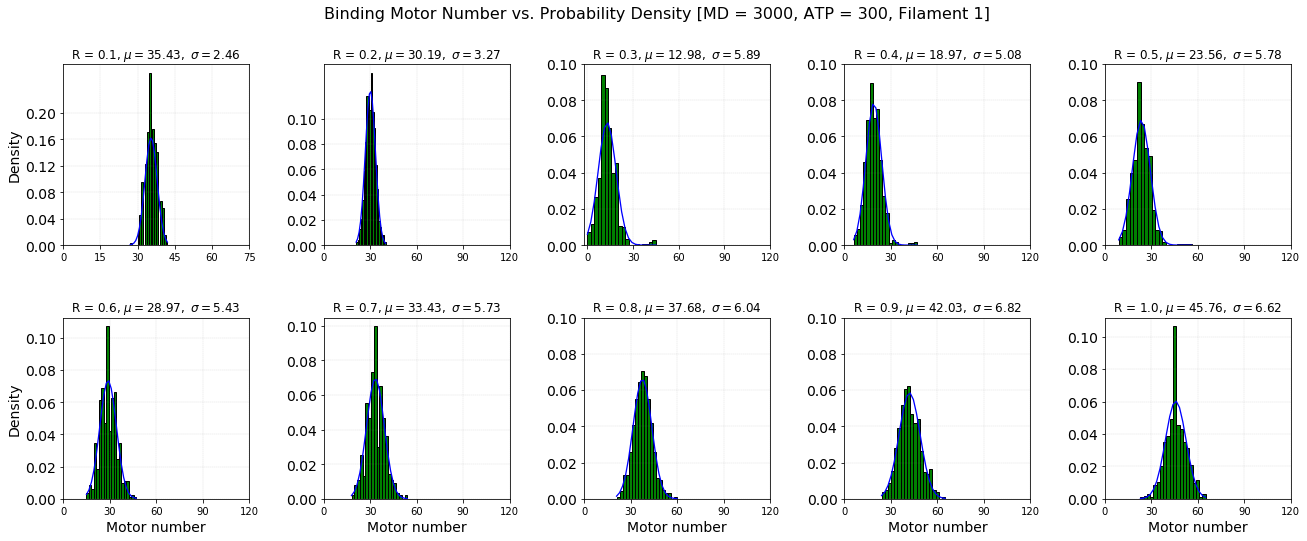

In [44]:
plt.figure(figsize=(22,8))
plt.axis('tight')
plt.suptitle('Binding Motor Number vs. Probability Density [MD = 3000, ATP = 300, Filament 1]', fontsize=16)

plt.subplots_adjust(wspace=0.4)
plt.subplots_adjust(hspace=0.4)

byn = 20; r = 0.1

for i in range(0,10):
    plt.subplot(2,5,i+1)
    (mu,sigma)=norm.fit(bm673_300[i])
    n,bins,patches = plt.hist(bm673_300[i],byn, density=True, alpha=1,histtype='bar',ec='black',color='green')
    plt.title(r'R = %.1f, $\mu=%.2f,\ \sigma=%.2f$' %(r, mu, sigma))
    plt.grid(color='gray',which='both',linestyle=':',linewidth=0.25)
    if i>0:
        plt.plot(bins,1/(sigma*np.sqrt(2*np.pi))*np.exp(-(bins-mu)**2/(2*sigma**2)),'b-',lw=1.3)
        plt.yticks(np.arange(0,0.11,step=0.02), fontsize=14)
        plt.xticks(np.arange(0,121,step=30))
    #elif i<3 and i>0:
        #plt.yticks(np.arange(0,2.1,step=0.4), fontsize=14)
        #plt.xticks(np.arange(0,31,step=5))
    elif i<1:
        plt.plot(bins,1/(sigma*np.sqrt(2*np.pi))*np.exp(-(bins-mu)**2/(2*sigma**2)),'b-',lw=1.3)
        plt.yticks(np.arange(0,0.21,step=0.04), fontsize=14)
        plt.xticks(np.arange(0,90,step=15))
    if i==0 or i==5:
        plt.ylabel('Density', fontsize=14)
    if i>4:
        plt.xlabel('Motor number', fontsize=14)
    r = r+0.1
plt.savefig('bmHist673ATP300.svg',fmt='svg',dpi=3000, bbox_inches='tight')

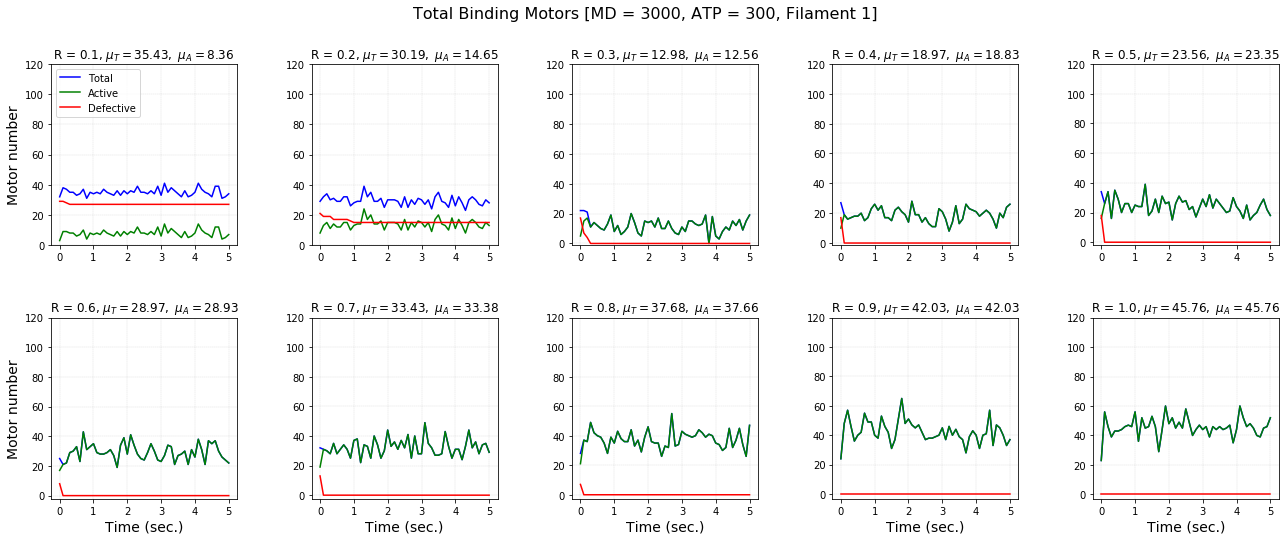

In [45]:
plt.figure(figsize=(22,8))
plt.axis('tight')
plt.suptitle('Total Binding Motors [MD = 3000, ATP = 300, Filament 1]', fontsize=16)

plt.subplots_adjust(wspace=0.4)
plt.subplots_adjust(hspace=0.4)

r = 0.1

for i in range(0,10):
    plt.subplot(2,5,i+1)
    plt.plot(simTym2[0::10],bm673_300[i][0::10], color='blue', label='Total')
    plt.plot(simTym2[0::10],bm673_300ac[i][0::10], color='green', label='Active')
    plt.plot(simTym2[0::10],(bm673_300[i][0::10] - bm673_300ac[i][0::10]), color='red', label='Defective')
    tMu = np.mean(bm673_300[i]); tSig = np.std(bm673_300[i])
    acMu = np.mean(bm673_300ac[i]); acSig = np.std(bm673_300ac[i])
    plt.title(r'R = %.1f, $\mu_T=%.2f,\ \mu_A=%.2f$' %(r, tMu, acMu))
    plt.grid(color='gray',which='both',linestyle=':',linewidth=0.25)
    plt.yticks(np.arange(0,120.1, step=20))
    if i==0:
        plt.legend(loc='upper left')
    if i==0 or i==5:
        plt.ylabel('Motor number', fontsize=14)
    if i>4:
        plt.xlabel('Time (sec.)', fontsize=14)
    r = r+0.1
plt.savefig('AllbM673ATP300.svg',fmt='svg',dpi=3000, bbox_inches='tight')

In [46]:
import numbers

/home/nitta/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


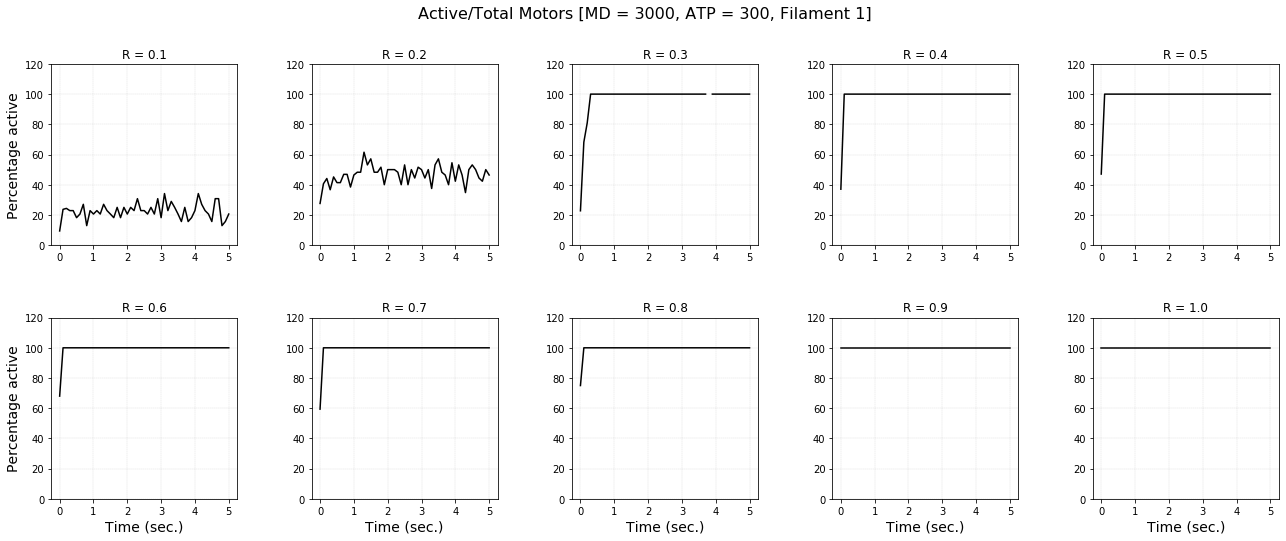

In [47]:
plt.figure(figsize=(22,8))
plt.axis('tight')
plt.suptitle('Active/Total Motors [MD = 3000, ATP = 300, Filament 1]', fontsize=16)

plt.subplots_adjust(wspace=0.4)
plt.subplots_adjust(hspace=0.4)

r = 0.1

for i in range(0,10):
    plt.subplot(2,5,i+1)
    plt.plot(simTym2[0::10],(bm673_300ac[i][0::10]/bm673_300[i][0::10])*100, color='black')
    #if (isinstance((bm673_300ac[i][0::10]/bm673_300[i][0::10]), int) == True):
        #print('%s / %s = %s' %(bm673_300ac[i][0::10], bm673_300[i][0::10], (bm673_300ac[i][0::10]/bm673_300[i][0::10])*100))
    plt.title('R = %.1f' %(r))
    plt.grid(color='gray',which='both',linestyle=':',linewidth=0.25)
    plt.yticks(np.arange(0,120.1, step=20))
    if i==0 or i==5:
        plt.ylabel('Percentage active', fontsize=14)
    if i>4:
        plt.xlabel('Time (sec.)', fontsize=14)
    r = r+0.1
plt.savefig('FracBM673ATP300.svg',fmt='svg',dpi=3000, bbox_inches='tight')

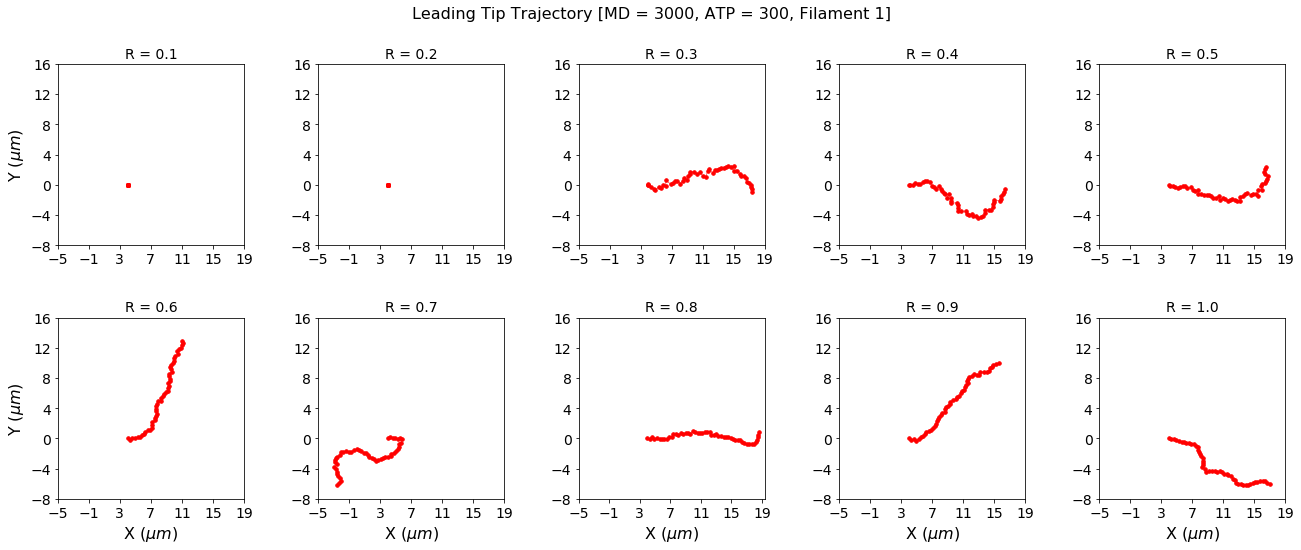

In [48]:
plt.figure(figsize=(22,8))
plt.suptitle('Leading Tip Trajectory [MD = 3000, ATP = 300, Filament 1]', fontsize=16)
plt.subplots_adjust(wspace=0.4)
plt.subplots_adjust(hspace=0.4)
plt.axes().set_aspect('equal')

r = 0.1

for i in range(0,10):
    plt.subplot(2,5,i+1)
    plt.plot(AF673_300[i]['x'],AF673_300[i]['y'], label='Leading tip', color='red', marker='.', linestyle='-', linewidth=0.5, markersize=7)
    plt.xticks(np.arange(-5,22,step=4),fontsize=14)
    plt.yticks(np.arange(-8,17,step=4),fontsize=14)
    plt.title('R = %.1f'%(r), fontsize=14)
    if i==0 or i==5:
        plt.ylabel('Y ($\mu m$)', fontsize=16)
    if i>4:
        plt.xlabel('X ($\mu m$)', fontsize=16)
    r = r+0.1
plt.savefig('traj673ATP300.svg',fmt='svg',dpi=3000, bbox_inches='tight')

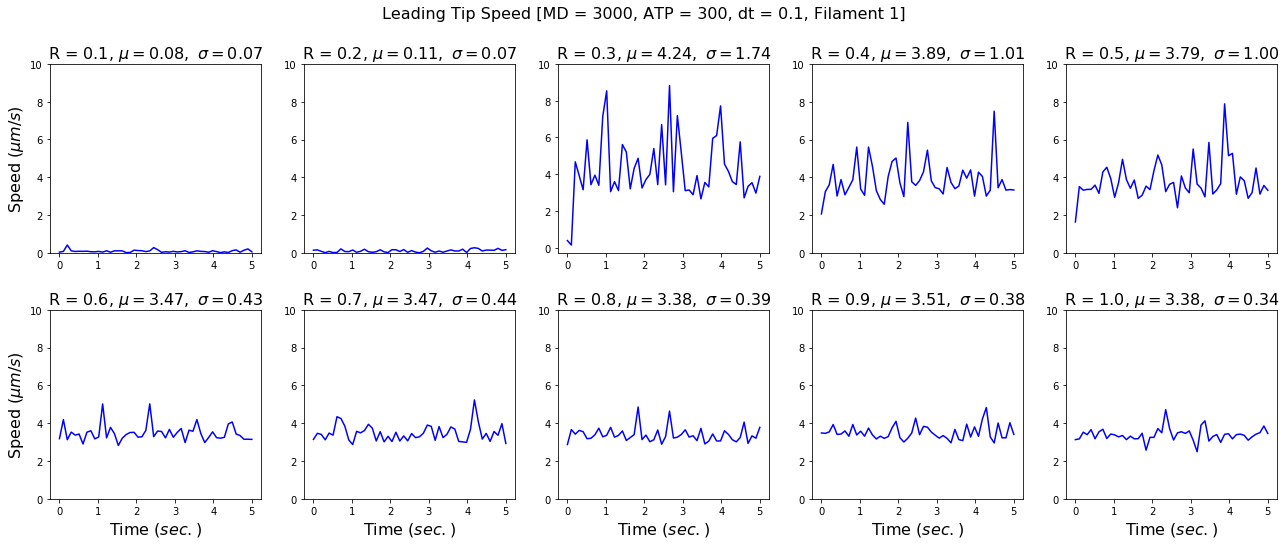

In [49]:
Dt = 0.01
r = 0.1

plt.figure(figsize=(22,8))
plt.suptitle('Leading Tip Speed [MD = 3000, ATP = 300, dt = 0.1, Filament 1]', fontsize=16)
plt.subplots_adjust(hspace=0.3)

for i in range(0,10):
    plt.subplot(2,5,i+1)
    dfVel = AF673_300a[i].iloc[0::10, :] #pick every 9th row starting from the first (0): dt = 0.1
    Dx_tip = np.diff(dfVel['x']); Dy_tip = np.diff(dfVel['y'])
    DD=np.sqrt((Dx_tip**2)+(Dy_tip**2))
    v=DD/(10*Dt) # use 10*Dt if you .iloc...
    
    avSpd = np.mean(v)
    stDev=np.sum(((v-avSpd)**2)/(np.size(v)-1)); stDev=np.sqrt(stDev)
    
    plt.plot(simTym,v, color='blue')
    plt.title(r'R = %.1f, $\mu=%.2f,\ \sigma=%.2f$' %(r, avSpd, stDev), fontsize=16)
    
    if i==0 or i==5:
        plt.ylabel('Speed ($\mu m/s$)', fontsize=16)
    if i>4:
        plt.xlabel('Time ($ sec. $)', fontsize=16)
    plt.yticks(np.arange(0,10.1, step=2))
    #plt.tick_params(labelsize=14)
    r += 0.1
plt.savefig('iSpd673ATP300.svg',fmt='svg',dpi=3000, bbox_inches='tight')


## Filament 2

In [50]:
#data for filament of random number 273, ATP50, from R0.1 to R1.0 simulated on date 26-12-2019
bm273 = []; r = 0.1 #Data in PC6

for j in range(10):
    bm273R = pd.read_csv('bm_no273ATP50R'+str(np.round(r,1))+'.csv', names=['bm'])
    bm273R = bm273R['bm'].T
    bm273.append(bm273R)
    r = r+0.1
bm273 = np.array(bm273)

In [51]:
bm273ac = []; r = 0.1 #Active motors

for j in range(10):
    bm273Rac = pd.read_csv('AbM273ATP50R'+str(np.round(r,1))+'.csv', names=['bm'])
    bm273Rac = bm273Rac['bm'].T
    bm273ac.append(bm273Rac)
    r = r+0.1
bm273ac = np.array(bm273ac)

In [52]:
AF273a = []; AF273 = []; r = 0.1

for j in range(10):
    AF273R = pd.read_csv('TipXY'+str(np.round(r,1))+'seed273ATP50.txt', names=['t', 'x', 'y'], delim_whitespace=True)
    AF273Rall = AF273R.drop(['t'], axis=1) # we don't need 't'. NB: dt = 0.01*1 = 0.01 sec
    AF273R = AF273Rall.iloc[0::10, :] #pick every 9th row starting from the first. Here dt = 0.01*10 = 0.1
    AF273a.append(AF273Rall); AF273.append(AF273R)
    r = r+0.1


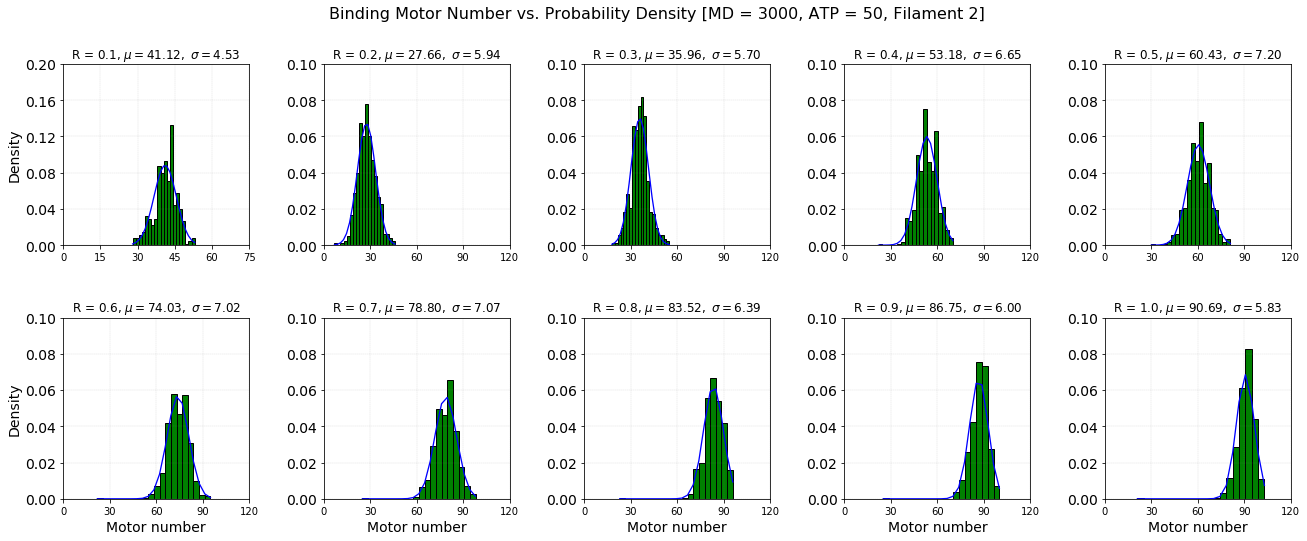

In [53]:
plt.figure(figsize=(22,8))
plt.axis('tight')
plt.suptitle('Binding Motor Number vs. Probability Density [MD = 3000, ATP = 50, Filament 2]', fontsize=16)

plt.subplots_adjust(wspace=0.4)
plt.subplots_adjust(hspace=0.4)

byn = 20; r = 0.1

for i in range(0,10):
    plt.subplot(2,5,i+1)
    (mu,sigma)=norm.fit(bm273[i])
    n,bins,patches = plt.hist(bm273[i],byn, density=True, alpha=1,histtype='bar',ec='black',color='green')
    plt.title(r'R = %.1f, $\mu=%.2f,\ \sigma=%.2f$' %(r, mu, sigma))
    plt.grid(color='gray',which='both',linestyle=':',linewidth=0.25)
    if i>0:
        plt.plot(bins,1/(sigma*np.sqrt(2*np.pi))*np.exp(-(bins-mu)**2/(2*sigma**2)),'b-',lw=1.3)
        plt.yticks(np.arange(0,0.11,step=0.02), fontsize=14)
        plt.xticks(np.arange(0,121,step=30))
    #elif i<3 and i>0:
        #plt.yticks(np.arange(0,2.1,step=0.4), fontsize=14)
        #plt.xticks(np.arange(0,31,step=5))
    elif i<1:
        plt.plot(bins,1/(sigma*np.sqrt(2*np.pi))*np.exp(-(bins-mu)**2/(2*sigma**2)),'b-',lw=1.3)
        plt.yticks(np.arange(0,0.21,step=0.04), fontsize=14)
        plt.xticks(np.arange(0,90,step=15))
    if i==0 or i==5:
        plt.ylabel('Density', fontsize=14)
    if i>4:
        plt.xlabel('Motor number', fontsize=14)
    r = r+0.1
plt.savefig('bmHist273ATP50.svg',fmt='svg',dpi=3000, bbox_inches='tight')

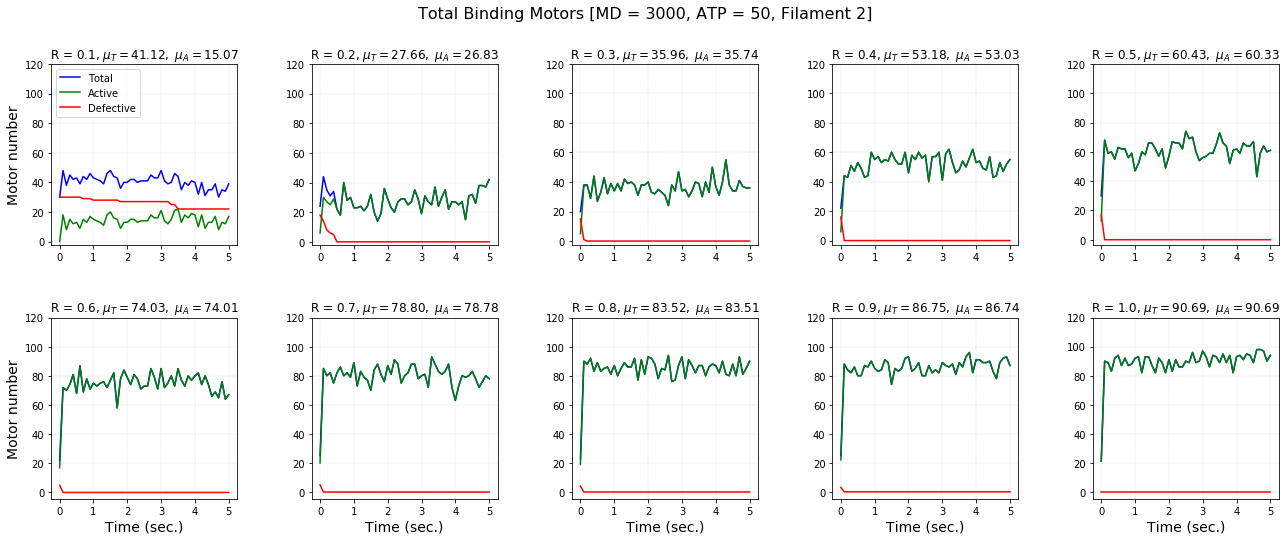

In [54]:
plt.figure(figsize=(22,8))
plt.axis('tight')
plt.suptitle('Total Binding Motors [MD = 3000, ATP = 50, Filament 2]', fontsize=16)

plt.subplots_adjust(wspace=0.4)
plt.subplots_adjust(hspace=0.4)

r = 0.1

for i in range(0,10):
    plt.subplot(2,5,i+1)
    plt.plot(simTym2[0::10],bm273[i][0::10], color='blue', label='Total')
    plt.plot(simTym2[0::10],bm273ac[i][0::10], color='green', label='Active')
    plt.plot(simTym2[0::10],(bm273[i][0::10] - bm273ac[i][0::10]), color='red', label='Defective')
    tMu = np.mean(bm273[i]); tSig = np.std(bm273[i])
    acMu = np.mean(bm273ac[i]); acSig = np.std(bm273ac[i])
    plt.title(r'R = %.1f, $\mu_T=%.2f,\ \mu_A=%.2f$' %(r, tMu, acMu))
    plt.grid(color='gray',which='both',linestyle=':',linewidth=0.25)
    plt.yticks(np.arange(0,120.1, step=20))
    if i==0:
        plt.legend(loc='upper left')
    if i==0 or i==5:
        plt.ylabel('Motor number', fontsize=14)
    if i>4:
        plt.xlabel('Time (sec.)', fontsize=14)
    r = r+0.1
plt.savefig('AllbM273ATP50.svg',fmt='svg',dpi=3000, bbox_inches='tight')

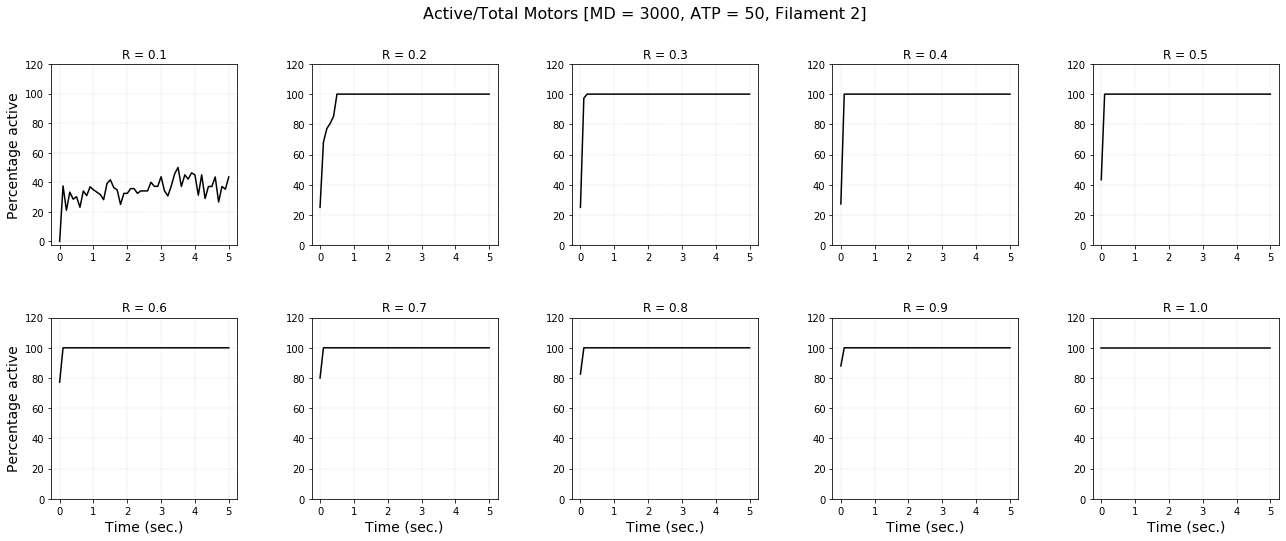

In [55]:
plt.figure(figsize=(22,8))
plt.axis('tight')
plt.suptitle('Active/Total Motors [MD = 3000, ATP = 50, Filament 2]', fontsize=16)

plt.subplots_adjust(wspace=0.4)
plt.subplots_adjust(hspace=0.4)

r = 0.1

for i in range(0,10):
    plt.subplot(2,5,i+1)
    plt.plot(simTym2[0::10],(bm273ac[i][0::10]/bm273[i][0::10])*100, color='black')
    plt.title('R = %.1f' %(r))
    plt.grid(color='gray',which='both',linestyle=':',linewidth=0.25)
    plt.yticks(np.arange(0,120.1, step=20))
    if i==0 or i==5:
        plt.ylabel('Percentage active', fontsize=14)
    if i>4:
        plt.xlabel('Time (sec.)', fontsize=14)
    r = r+0.1
plt.savefig('FracBM273ATP50.svg',fmt='svg',dpi=3000, bbox_inches='tight')

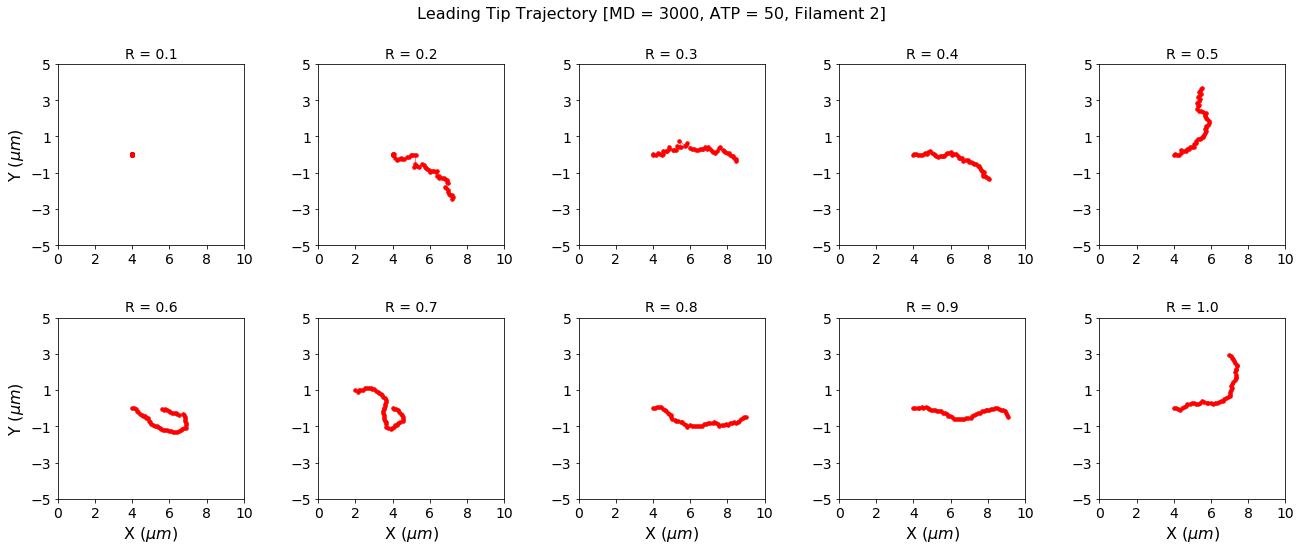

In [56]:
plt.figure(figsize=(22,8))
plt.suptitle('Leading Tip Trajectory [MD = 3000, ATP = 50, Filament 2]', fontsize=16)
plt.subplots_adjust(wspace=0.4)
plt.subplots_adjust(hspace=0.4)
plt.axes().set_aspect('equal')

r = 0.1

for i in range(0,10):
    plt.subplot(2,5,i+1)
    plt.plot(AF273[i]['x'],AF273[i]['y'], label='Leading tip', color='red', marker='.', linestyle='-', linewidth=0.5, markersize=7)
    plt.xticks(np.arange(0,11,step=2),fontsize=14)
    plt.yticks(np.arange(-5,6,step=2),fontsize=14)
    plt.title('R = %.1f'%(r), fontsize=14)
    if i==0 or i==5:
        plt.ylabel('Y ($\mu m$)', fontsize=16)
    if i>4:
        plt.xlabel('X ($\mu m$)', fontsize=16)
    r = r+0.1
plt.savefig('traj273ATP50.svg',fmt='svg',dpi=3000, bbox_inches='tight')

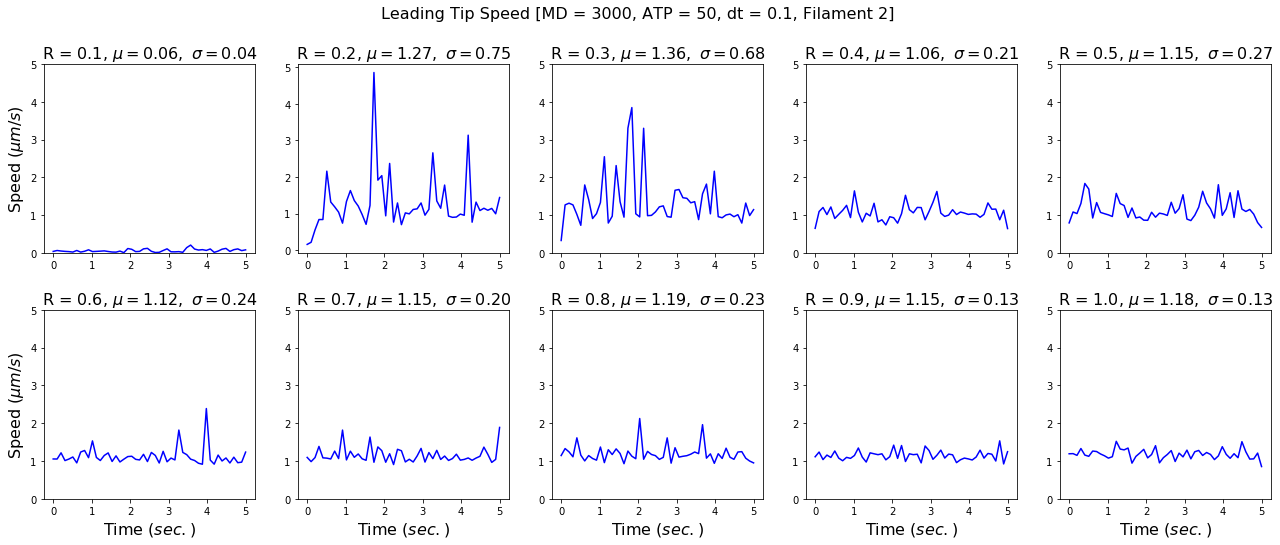

In [57]:
Dt = 0.01
r = 0.1

plt.figure(figsize=(22,8))
plt.suptitle('Leading Tip Speed [MD = 3000, ATP = 50, dt = 0.1, Filament 2]', fontsize=16)
plt.subplots_adjust(hspace=0.3)

for i in range(0,10):
    plt.subplot(2,5,i+1)
    dfVel = AF273a[i].iloc[0::10, :] #pick every 9th row starting from the first (0): dt = 0.1
    Dx_tip = np.diff(dfVel['x']); Dy_tip = np.diff(dfVel['y'])
    DD=np.sqrt((Dx_tip**2)+(Dy_tip**2))
    v=DD/(10*Dt) # use 10*Dt if you .iloc...
    
    avSpd = np.mean(v)
    stDev=np.sum(((v-avSpd)**2)/(np.size(v)-1)); stDev=np.sqrt(stDev)
    
    plt.plot(simTym,v, color='blue')
    plt.title(r'R = %.1f, $\mu=%.2f,\ \sigma=%.2f$' %(r, avSpd, stDev), fontsize=16)
    
    if i==0 or i==5:
        plt.ylabel('Speed ($\mu m/s$)', fontsize=16)
    if i>4:
        plt.xlabel('Time ($ sec. $)', fontsize=16)
    plt.yticks(np.arange(0,5.1, step=1))
    #plt.tick_params(labelsize=14)
    r += 0.1
plt.savefig('iSpd273ATP50.svg',fmt='svg',dpi=3000, bbox_inches='tight')


In [58]:
#data for filament of random number 273, ATP100, from R0.1 to R1.0
bm273_100 = []; r = 0.1 #Data in PC7

for j in range(10):
    bm273a100 = pd.read_csv('bm_no273ATP100R'+str(np.round(r,1))+'.csv', names=['bm'])
    bm273a100 = bm273a100['bm'].T
    bm273_100.append(bm273a100)
    r = r+0.1
bm273_100 = np.array(bm273_100)

In [59]:
bm273_100ac = []; r = 0.1 #Active motors

for j in range(10):
    bm273_100Rac = pd.read_csv('AbM273ATP100R'+str(np.round(r,1))+'.csv', names=['bm'])
    bm273_100Rac = bm273_100Rac['bm'].T
    bm273_100ac.append(bm273_100Rac)
    r = r+0.1
bm273_100ac = np.array(bm273_100ac)

In [60]:
AF273_100a = []; AF273_100 = []; r = 0.1

for j in range(10):
    AF273a100 = pd.read_csv('TipXY'+str(np.round(r,1))+'seed273ATP100.txt', names=['t', 'x', 'y'], delim_whitespace=True)
    AF273a100all = AF273a100.drop(['t'], axis=1) # we don't need 't'. NB: dt = 0.01*1 = 0.01 sec
    AF273a100 = AF273a100all.iloc[0::10, :] #pick every 9th row starting from the first. Here dt = 0.01*10 = 0.1
    AF273_100a.append(AF273a100all); AF273_100.append(AF273a100)
    r = r+0.1

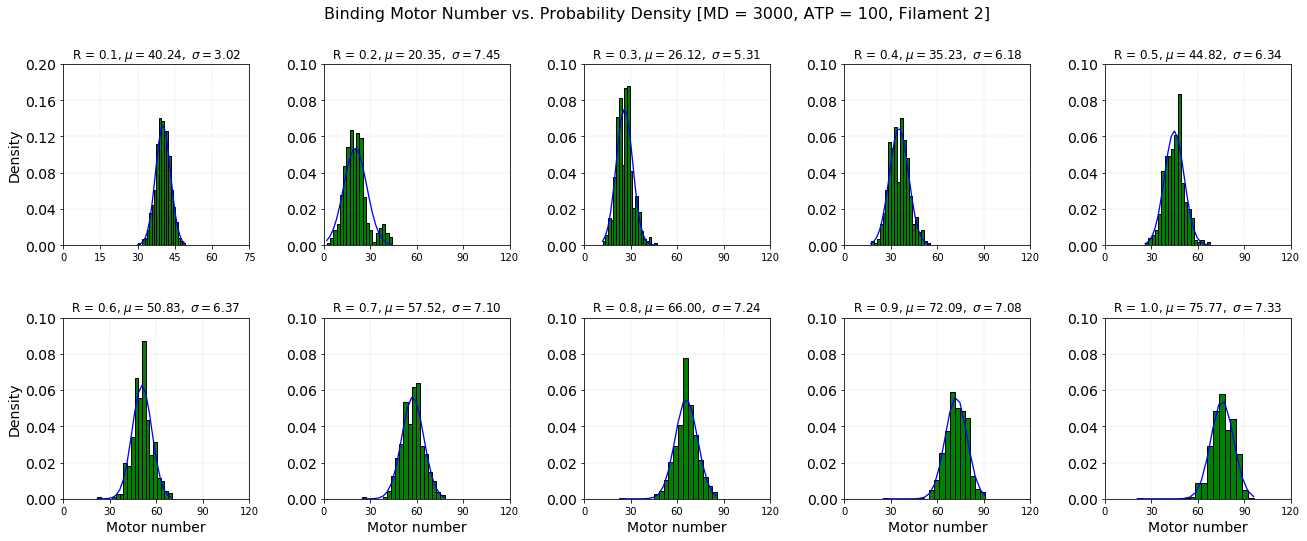

In [61]:
plt.figure(figsize=(22,8))
plt.axis('tight')
plt.suptitle('Binding Motor Number vs. Probability Density [MD = 3000, ATP = 100, Filament 2]', fontsize=16)

plt.subplots_adjust(wspace=0.4)
plt.subplots_adjust(hspace=0.4)

byn = 20; r = 0.1

for i in range(0,10):
    plt.subplot(2,5,i+1)
    (mu,sigma)=norm.fit(bm273_100[i])
    n,bins,patches = plt.hist(bm273_100[i],byn, density=True, alpha=1,histtype='bar',ec='black',color='green')
    plt.title(r'R = %.1f, $\mu=%.2f,\ \sigma=%.2f$' %(r, mu, sigma))
    plt.grid(color='gray',which='both',linestyle=':',linewidth=0.25)
    if i>0:
        plt.plot(bins,1/(sigma*np.sqrt(2*np.pi))*np.exp(-(bins-mu)**2/(2*sigma**2)),'b-',lw=1.3)
        plt.yticks(np.arange(0,0.11,step=0.02), fontsize=14)
        plt.xticks(np.arange(0,121,step=30))
    #elif i<3 and i>0:
        #plt.yticks(np.arange(0,2.1,step=0.4), fontsize=14)
        #plt.xticks(np.arange(0,31,step=5))
    elif i<1:
        plt.plot(bins,1/(sigma*np.sqrt(2*np.pi))*np.exp(-(bins-mu)**2/(2*sigma**2)),'b-',lw=1.3)
        plt.yticks(np.arange(0,0.21,step=0.04), fontsize=14)
        plt.xticks(np.arange(0,90,step=15))
    if i==0 or i==5:
        plt.ylabel('Density', fontsize=14)
    if i>4:
        plt.xlabel('Motor number', fontsize=14)
    r = r+0.1
plt.savefig('bmHist273ATP100.svg',fmt='svg',dpi=3000, bbox_inches='tight')

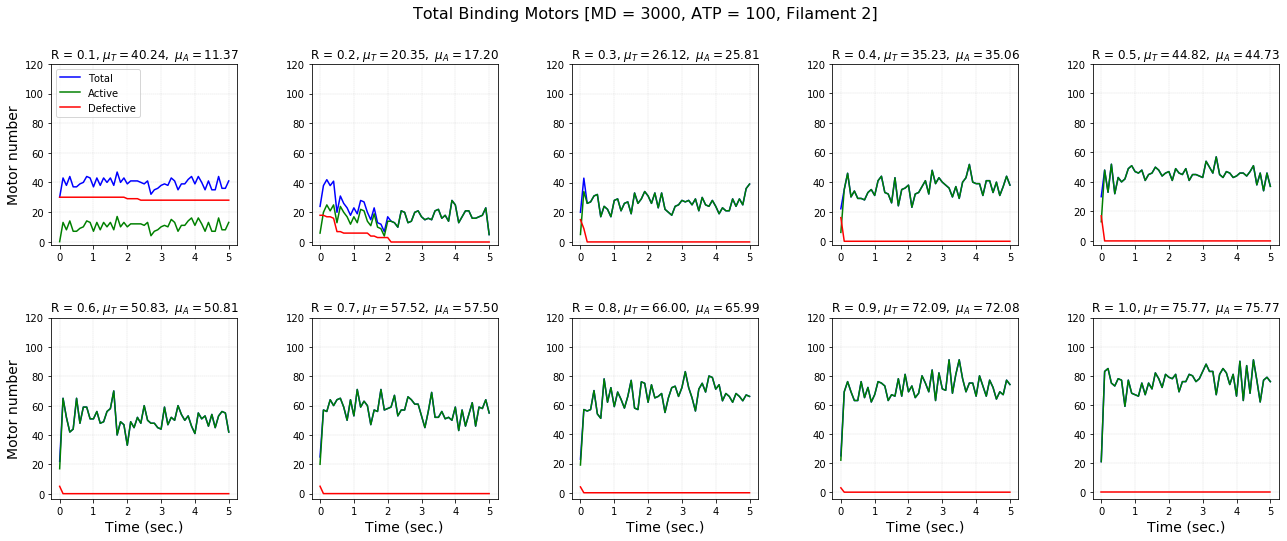

In [62]:
plt.figure(figsize=(22,8))
plt.axis('tight')
plt.suptitle('Total Binding Motors [MD = 3000, ATP = 100, Filament 2]', fontsize=16)

plt.subplots_adjust(wspace=0.4)
plt.subplots_adjust(hspace=0.4)

r = 0.1

for i in range(0,10):
    plt.subplot(2,5,i+1)
    plt.plot(simTym2[0::10],bm273_100[i][0::10], color='blue', label='Total')
    plt.plot(simTym2[0::10],bm273_100ac[i][0::10], color='green', label='Active')
    plt.plot(simTym2[0::10],(bm273_100[i][0::10] - bm273_100ac[i][0::10]), color='red', label='Defective')
    tMu = np.mean(bm273_100[i]); tSig = np.std(bm273_100[i])
    acMu = np.mean(bm273_100ac[i]); acSig = np.std(bm273_100ac[i])
    plt.title(r'R = %.1f, $\mu_T=%.2f,\ \mu_A=%.2f$' %(r, tMu, acMu))
    plt.grid(color='gray',which='both',linestyle=':',linewidth=0.25)
    plt.yticks(np.arange(0,120.1, step=20))
    if i==0:
        plt.legend(loc='upper left')
    if i==0 or i==5:
        plt.ylabel('Motor number', fontsize=14)
    if i>4:
        plt.xlabel('Time (sec.)', fontsize=14)
    r = r+0.1
plt.savefig('AllbM273ATP100.svg',fmt='svg',dpi=3000, bbox_inches='tight')

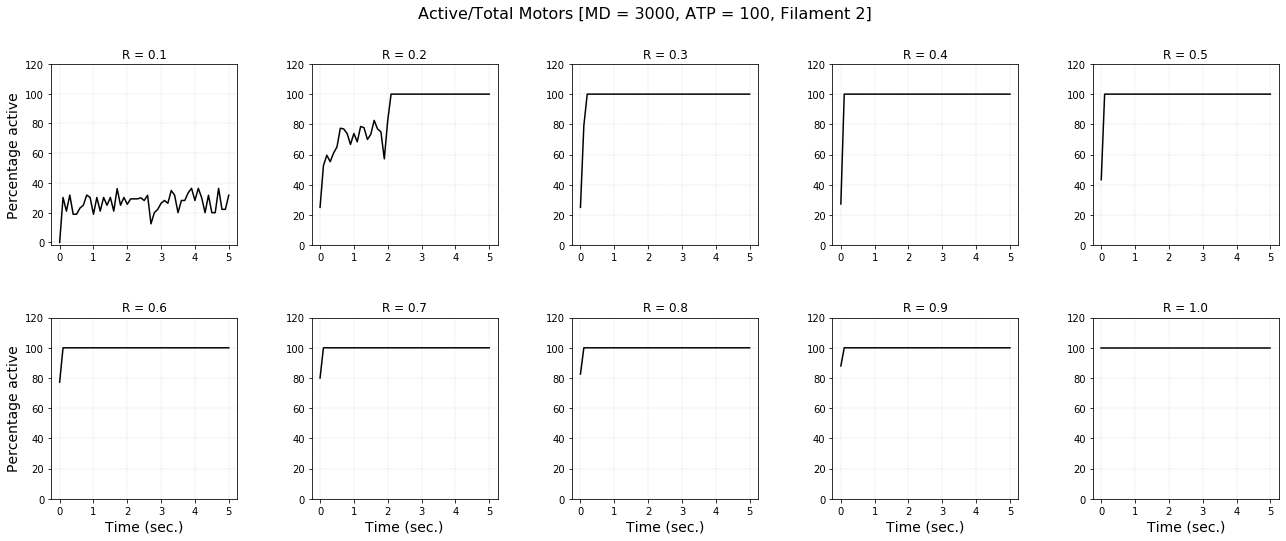

In [63]:
plt.figure(figsize=(22,8))
plt.axis('tight')
plt.suptitle('Active/Total Motors [MD = 3000, ATP = 100, Filament 2]', fontsize=16)

plt.subplots_adjust(wspace=0.4)
plt.subplots_adjust(hspace=0.4)

r = 0.1

for i in range(0,10):
    plt.subplot(2,5,i+1)
    plt.plot(simTym2[0::10],(bm273_100ac[i][0::10]/bm273_100[i][0::10])*100, color='black')
    plt.title('R = %.1f' %(r))
    plt.grid(color='gray',which='both',linestyle=':',linewidth=0.25)
    plt.yticks(np.arange(0,120.1, step=20))
    if i==0 or i==5:
        plt.ylabel('Percentage active', fontsize=14)
    if i>4:
        plt.xlabel('Time (sec.)', fontsize=14)
    r = r+0.1
plt.savefig('FracBM273ATP100.svg',fmt='svg',dpi=3000, bbox_inches='tight')

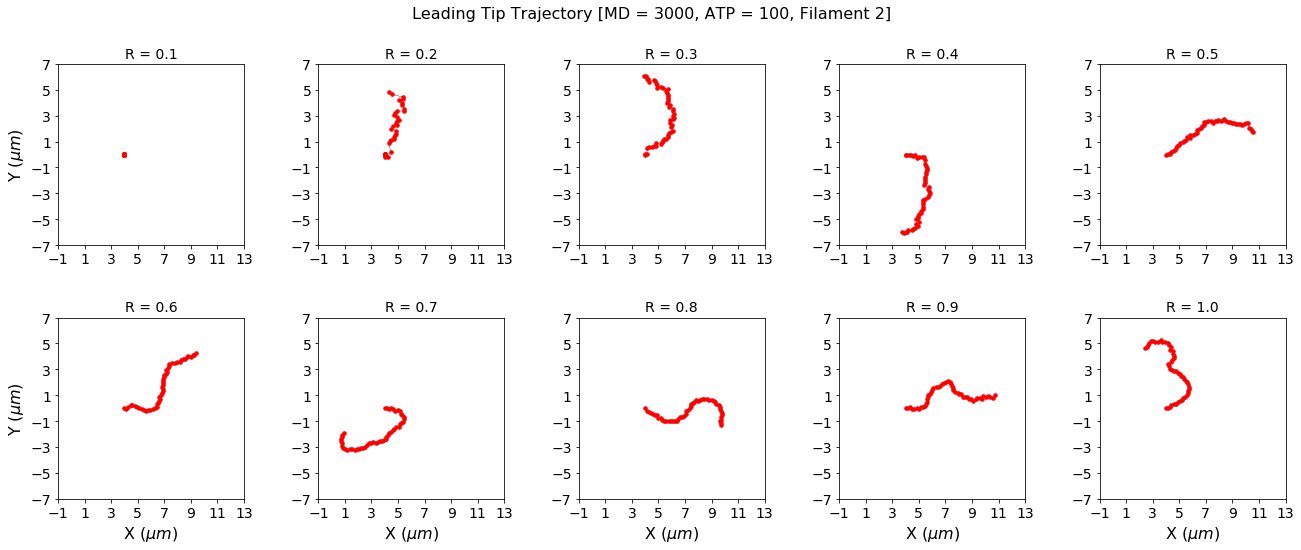

In [64]:
plt.figure(figsize=(22,8))
plt.suptitle('Leading Tip Trajectory [MD = 3000, ATP = 100, Filament 2]', fontsize=16)
plt.subplots_adjust(wspace=0.4)
plt.subplots_adjust(hspace=0.4)
plt.axes().set_aspect('equal')

r = 0.1

for i in range(0,10):
    plt.subplot(2,5,i+1)
    plt.plot(AF273_100[i]['x'],AF273_100[i]['y'], label='Leading tip', color='red', marker='.', linestyle='-', linewidth=0.5, markersize=7)
    plt.xticks(np.arange(-1,14,step=2),fontsize=14)
    plt.yticks(np.arange(-7,8,step=2),fontsize=14)
    plt.title('R = %.1f'%(r), fontsize=14)
    if i==0 or i==5:
        plt.ylabel('Y ($\mu m$)', fontsize=16)
    if i>4:
        plt.xlabel('X ($\mu m$)', fontsize=16)
    r = r+0.1
plt.savefig('traj273ATP100.svg',fmt='svg',dpi=3000, bbox_inches='tight')

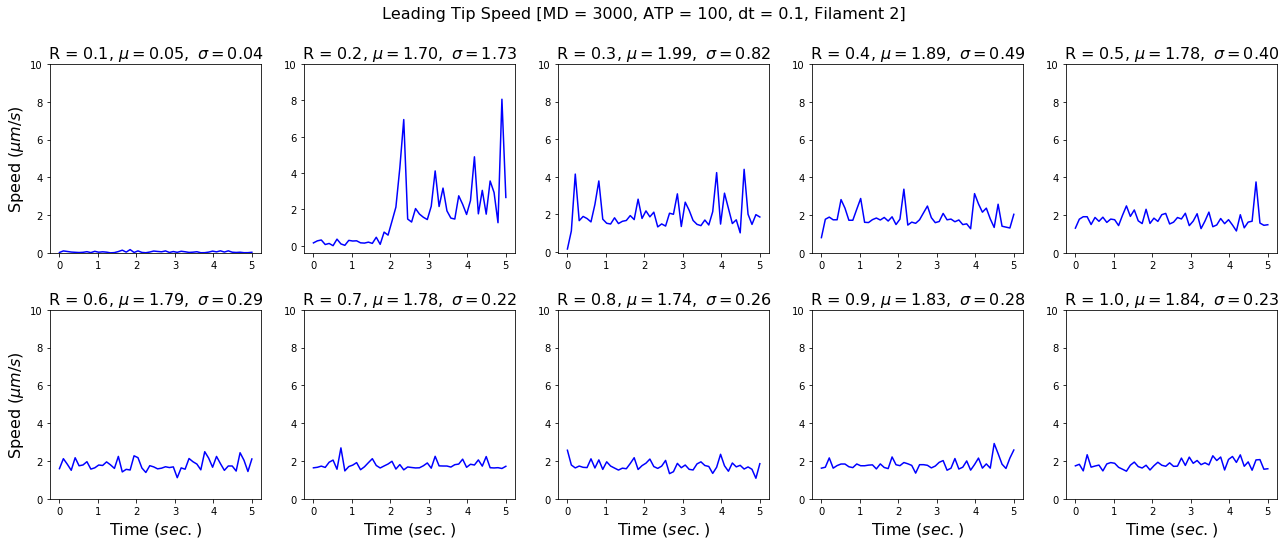

In [65]:
Dt = 0.01
r = 0.1

plt.figure(figsize=(22,8))
plt.suptitle('Leading Tip Speed [MD = 3000, ATP = 100, dt = 0.1, Filament 2]', fontsize=16)
plt.subplots_adjust(hspace=0.3)

for i in range(0,10):
    plt.subplot(2,5,i+1)
    dfVel = AF273_100a[i].iloc[0::10, :] #pick every 9th row starting from the first (0): dt = 0.1
    Dx_tip = np.diff(dfVel['x']); Dy_tip = np.diff(dfVel['y'])
    DD=np.sqrt((Dx_tip**2)+(Dy_tip**2))
    v=DD/(10*Dt) # use 10*Dt if you .iloc...
    
    avSpd = np.mean(v)
    stDev=np.sum(((v-avSpd)**2)/(np.size(v)-1)); stDev=np.sqrt(stDev)
    
    plt.plot(simTym,v, color='blue')
    plt.title(r'R = %.1f, $\mu=%.2f,\ \sigma=%.2f$' %(r, avSpd, stDev), fontsize=16)
    
    if i==0 or i==5:
        plt.ylabel('Speed ($\mu m/s$)', fontsize=16)
    if i>4:
        plt.xlabel('Time ($ sec. $)', fontsize=16)
    plt.yticks(np.arange(0,10.1, step=2))
    #plt.tick_params(labelsize=14)
    r += 0.1
plt.savefig('iSpd273ATP100.svg',fmt='svg',dpi=3000, bbox_inches='tight')


In [66]:
#data for filament of random number 273, ATP200, from R0.1 to R1.0
bm273_200 = []; r = 0.1 #Data in PC8

for j in range(10):
    bm273a200 = pd.read_csv('bm_no273ATP200R'+str(np.round(r,1))+'.csv', names=['bm'])
    bm273a200 = bm273a200['bm'].T
    bm273_200.append(bm273a200)
    r = r+0.1
bm273_200 = np.array(bm273_200)

In [67]:
bm273_200ac = []; r = 0.1 #Active motors

for j in range(10):
    bm273_200Rac = pd.read_csv('AbM273ATP200R'+str(np.round(r,1))+'.csv', names=['bm'])
    bm273_200Rac = bm273_200Rac['bm'].T
    bm273_200ac.append(bm273_200Rac)
    r = r+0.1
bm273_200ac = np.array(bm273_200ac)

In [68]:
AF273_200a = []; AF273_200 = []; r = 0.1

for j in range(10):
    AF273a200 = pd.read_csv('TipXY'+str(np.round(r,1))+'seed273ATP200.txt', names=['t', 'x', 'y'], delim_whitespace=True)
    AF273a200all = AF273a200.drop(['t'], axis=1) # we don't need 't'. NB: dt = 0.01*1 = 0.01 sec
    AF273a200 = AF273a200all.iloc[0::10, :] #pick every 9th row starting from the first. Here dt = 0.01*10 = 0.1
    AF273_200a.append(AF273a200all); AF273_200.append(AF273a200)
    r = r+0.1

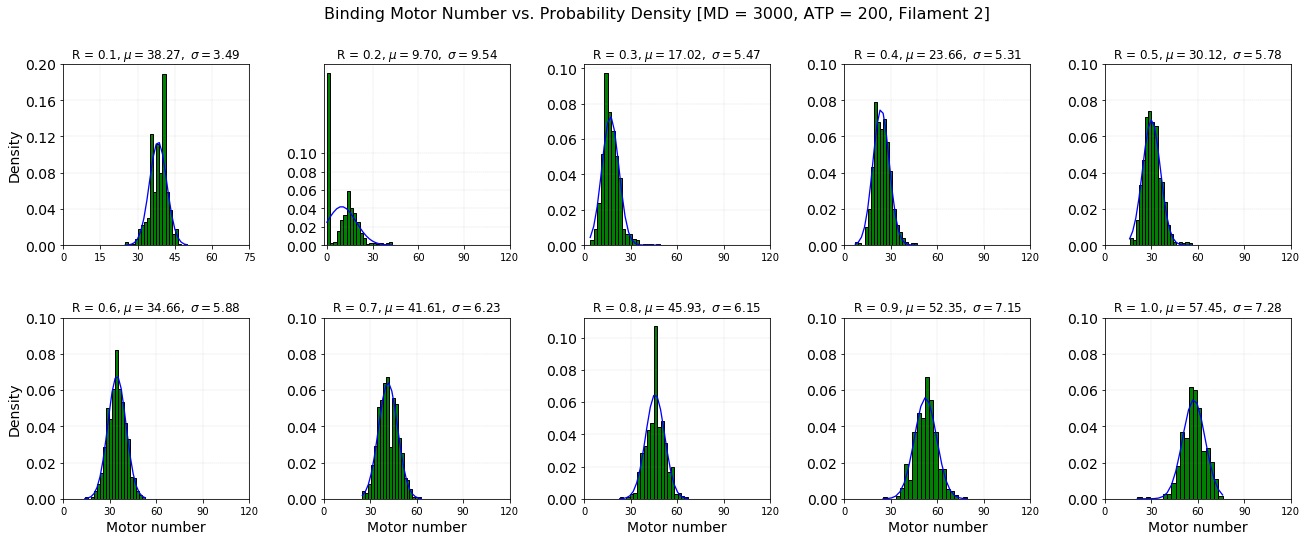

In [69]:
plt.figure(figsize=(22,8))
plt.axis('tight')
plt.suptitle('Binding Motor Number vs. Probability Density [MD = 3000, ATP = 200, Filament 2]', fontsize=16)

plt.subplots_adjust(wspace=0.4)
plt.subplots_adjust(hspace=0.4)

byn = 20; r = 0.1

for i in range(0,10):
    plt.subplot(2,5,i+1)
    (mu,sigma)=norm.fit(bm273_200[i])
    n,bins,patches = plt.hist(bm273_200[i],byn, density=True, alpha=1,histtype='bar',ec='black',color='green')
    plt.title(r'R = %.1f, $\mu=%.2f,\ \sigma=%.2f$' %(r, mu, sigma))
    plt.grid(color='gray',which='both',linestyle=':',linewidth=0.25)
    if i>0:
        plt.plot(bins,1/(sigma*np.sqrt(2*np.pi))*np.exp(-(bins-mu)**2/(2*sigma**2)),'b-',lw=1.3)
        plt.yticks(np.arange(0,0.11,step=0.02), fontsize=14)
        plt.xticks(np.arange(0,121,step=30))
    #elif i<3 and i>0:
        #plt.yticks(np.arange(0,2.1,step=0.4), fontsize=14)
        #plt.xticks(np.arange(0,31,step=5))
    elif i<1:
        plt.plot(bins,1/(sigma*np.sqrt(2*np.pi))*np.exp(-(bins-mu)**2/(2*sigma**2)),'b-',lw=1.3)
        plt.yticks(np.arange(0,0.21,step=0.04), fontsize=14)
        plt.xticks(np.arange(0,90,step=15))
    if i==0 or i==5:
        plt.ylabel('Density', fontsize=14)
    if i>4:
        plt.xlabel('Motor number', fontsize=14)
    r = r+0.1
plt.savefig('bmHist273ATP200.svg',fmt='svg',dpi=3000, bbox_inches='tight')

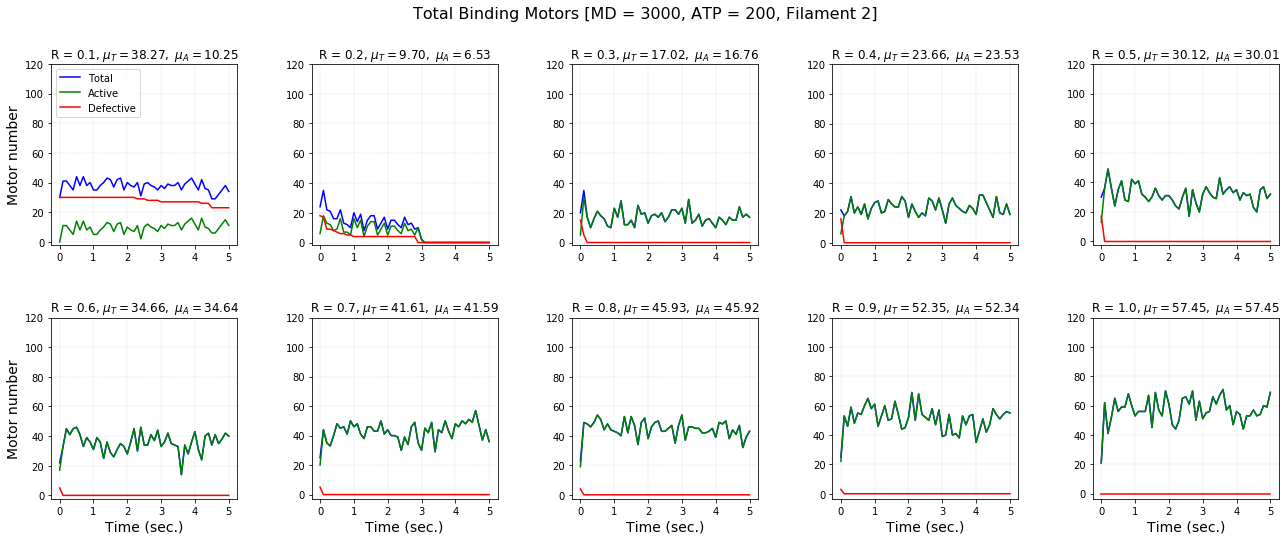

In [70]:
plt.figure(figsize=(22,8))
plt.axis('tight')
plt.suptitle('Total Binding Motors [MD = 3000, ATP = 200, Filament 2]', fontsize=16)

plt.subplots_adjust(wspace=0.4)
plt.subplots_adjust(hspace=0.4)

r = 0.1

for i in range(0,10):
    plt.subplot(2,5,i+1)
    plt.plot(simTym2[0::10],bm273_200[i][0::10], color='blue', label='Total')
    plt.plot(simTym2[0::10],bm273_200ac[i][0::10], color='green', label='Active')
    plt.plot(simTym2[0::10],(bm273_200[i][0::10] - bm273_200ac[i][0::10]), color='red', label='Defective')
    tMu = np.mean(bm273_200[i]); tSig = np.std(bm273_200[i])
    acMu = np.mean(bm273_200ac[i]); acSig = np.std(bm273_200ac[i])
    plt.title(r'R = %.1f, $\mu_T=%.2f,\ \mu_A=%.2f$' %(r, tMu, acMu))
    plt.grid(color='gray',which='both',linestyle=':',linewidth=0.25)
    plt.yticks(np.arange(0,120.1, step=20))
    if i==0:
        plt.legend(loc='upper left')
    if i==0 or i==5:
        plt.ylabel('Motor number', fontsize=14)
    if i>4:
        plt.xlabel('Time (sec.)', fontsize=14)
    r = r+0.1
plt.savefig('AllbM273ATP200.svg',fmt='svg',dpi=3000, bbox_inches='tight')

/home/nitta/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


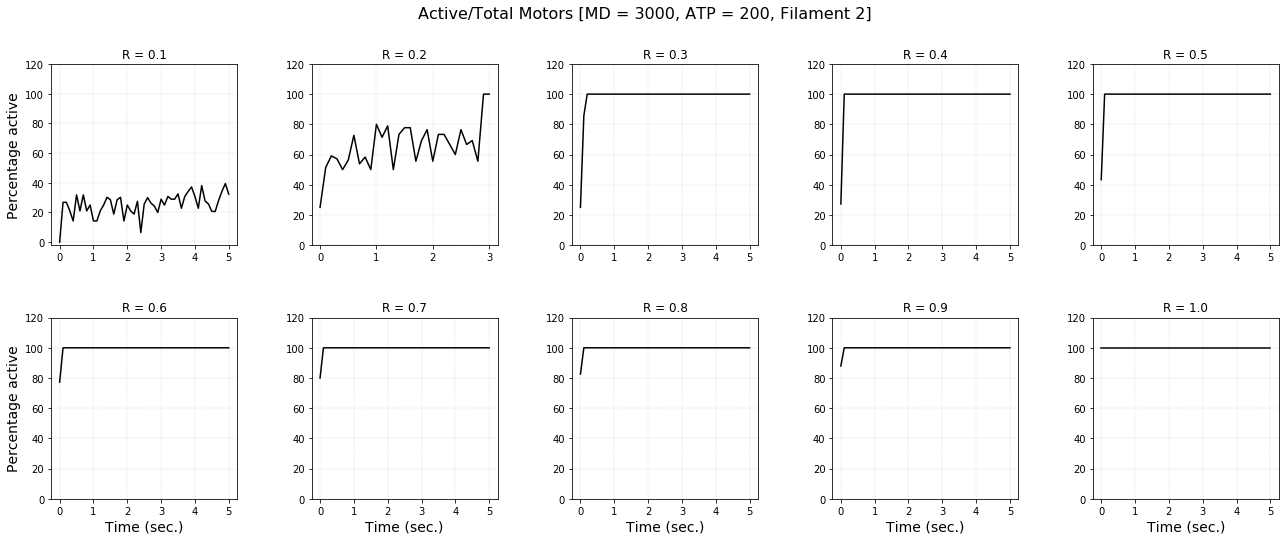

In [71]:
plt.figure(figsize=(22,8))
plt.axis('tight')
plt.suptitle('Active/Total Motors [MD = 3000, ATP = 200, Filament 2]', fontsize=16)

plt.subplots_adjust(wspace=0.4)
plt.subplots_adjust(hspace=0.4)

r = 0.1

for i in range(0,10):
    plt.subplot(2,5,i+1)
    plt.plot(simTym2[0::10],(bm273_200ac[i][0::10]/bm273_200[i][0::10])*100, color='black')
    plt.title('R = %.1f' %(r))
    plt.grid(color='gray',which='both',linestyle=':',linewidth=0.25)
    plt.yticks(np.arange(0,120.1, step=20))
    if i==0 or i==5:
        plt.ylabel('Percentage active', fontsize=14)
    if i>4:
        plt.xlabel('Time (sec.)', fontsize=14)
    r = r+0.1
plt.savefig('FracBM273ATP200.svg',fmt='svg',dpi=3000, bbox_inches='tight')

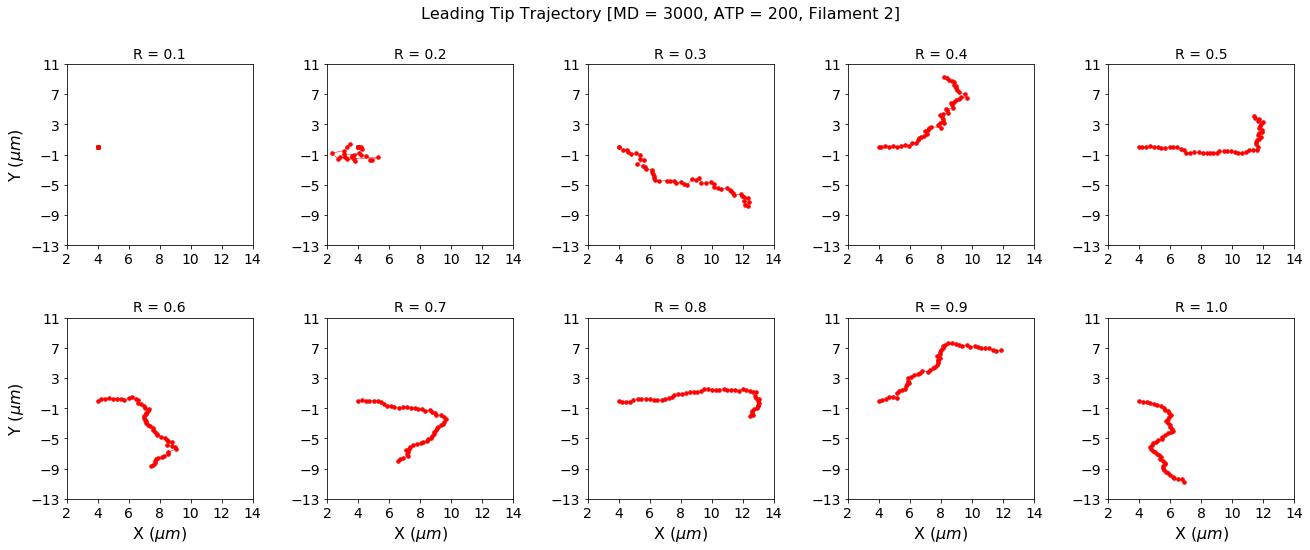

In [72]:
plt.figure(figsize=(22,8))
plt.suptitle('Leading Tip Trajectory [MD = 3000, ATP = 200, Filament 2]', fontsize=16)
plt.subplots_adjust(wspace=0.4)
plt.subplots_adjust(hspace=0.4)
plt.axes().set_aspect('equal')

r = 0.1

for i in range(0,10):
    plt.subplot(2,5,i+1)
    plt.plot(AF273_200[i]['x'],AF273_200[i]['y'], label='Leading tip', color='red', marker='.', linestyle='-', linewidth=0.5, markersize=7)
    plt.xticks(np.arange(2,16,step=2),fontsize=14)
    plt.yticks(np.arange(-13,12,step=4),fontsize=14)
    plt.title('R = %.1f'%(r), fontsize=14)
    if i==0 or i==5:
        plt.ylabel('Y ($\mu m$)', fontsize=16)
    if i>4:
        plt.xlabel('X ($\mu m$)', fontsize=16)
    r = r+0.1
plt.savefig('traj273ATP200.svg',fmt='svg',dpi=3000, bbox_inches='tight')

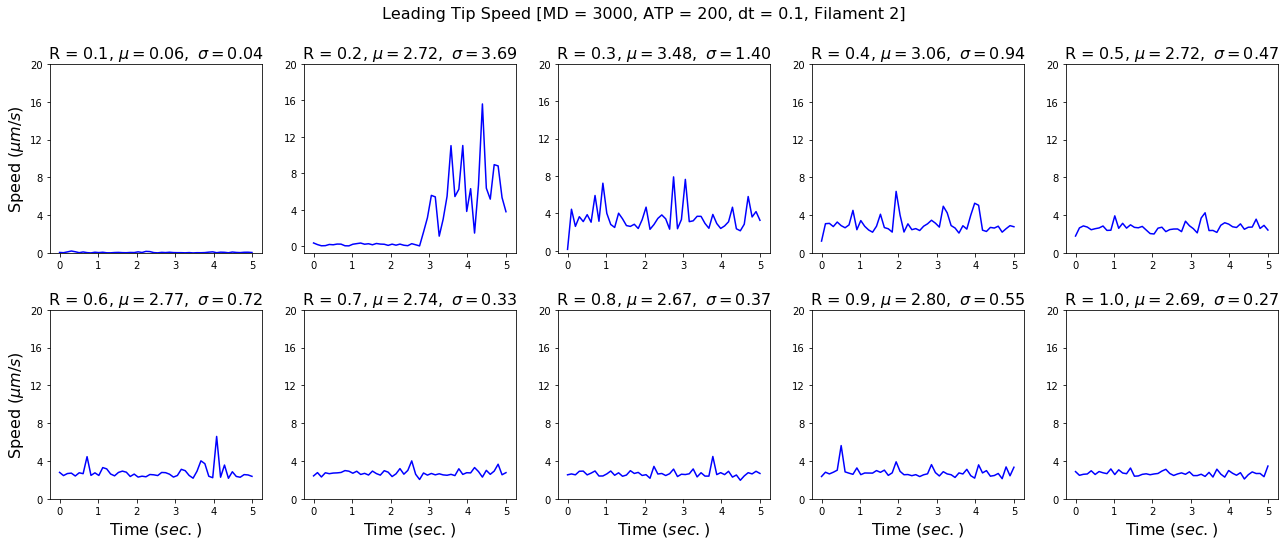

In [73]:
Dt = 0.01
r = 0.1

plt.figure(figsize=(22,8))
plt.suptitle('Leading Tip Speed [MD = 3000, ATP = 200, dt = 0.1, Filament 2]', fontsize=16)
plt.subplots_adjust(hspace=0.3)

for i in range(0,10):
    plt.subplot(2,5,i+1)
    dfVel = AF273_200a[i].iloc[0::10, :] #pick every 9th row starting from the first (0): dt = 0.1
    Dx_tip = np.diff(dfVel['x']); Dy_tip = np.diff(dfVel['y'])
    DD=np.sqrt((Dx_tip**2)+(Dy_tip**2))
    v=DD/(10*Dt) # use 10*Dt if you .iloc...
    
    avSpd = np.mean(v)
    stDev=np.sum(((v-avSpd)**2)/(np.size(v)-1)); stDev=np.sqrt(stDev)
    
    plt.plot(simTym,v, color='blue')
    plt.title(r'R = %.1f, $\mu=%.2f,\ \sigma=%.2f$' %(r, avSpd, stDev), fontsize=16)
    
    if i==0 or i==5:
        plt.ylabel('Speed ($\mu m/s$)', fontsize=16)
    if i>4:
        plt.xlabel('Time ($ sec. $)', fontsize=16)
    plt.yticks(np.arange(0,20.1, step=4))
    #plt.tick_params(labelsize=14)
    r += 0.1
plt.savefig('iSpd273ATP200.svg',fmt='svg',dpi=3000, bbox_inches='tight')


In [74]:
#data for filament of random number 273, ATP300, from R0.1 to R1.0
bm273_300 = []; r = 0.1 #Data in PC9

for j in range(10):
    bm273a300 = pd.read_csv('bm_no273ATP300R'+str(np.round(r,1))+'.csv', names=['bm'])
    bm273a300 = bm273a300['bm'].T
    bm273_300.append(bm273a300)
    r = r+0.1
bm273_300 = np.array(bm273_300)

In [75]:
bm273_300ac = []; r = 0.1 #Active motors

for j in range(10):
    bm273_300Rac = pd.read_csv('AbM273ATP300R'+str(np.round(r,1))+'.csv', names=['bm'])
    bm273_300Rac = bm273_300Rac['bm'].T
    bm273_300ac.append(bm273_300Rac)
    r = r+0.1
bm273_300ac = np.array(bm273_300ac)

In [76]:
AF273_300a = []; AF273_300 = []; r = 0.1

for j in range(10):
    AF273a300 = pd.read_csv('TipXY'+str(np.round(r,1))+'seed273ATP300.txt', names=['t', 'x', 'y'], delim_whitespace=True)
    AF273a300all = AF273a300.drop(['t'], axis=1) # we don't need 't'. NB: dt = 0.01*1 = 0.01 sec
    AF273a300 = AF273a300all.iloc[0::10, :] #pick every 9th row starting from the first. Here dt = 0.01*10 = 0.1
    AF273_300a.append(AF273a300all); AF273_300.append(AF273a300)
    r = r+0.1

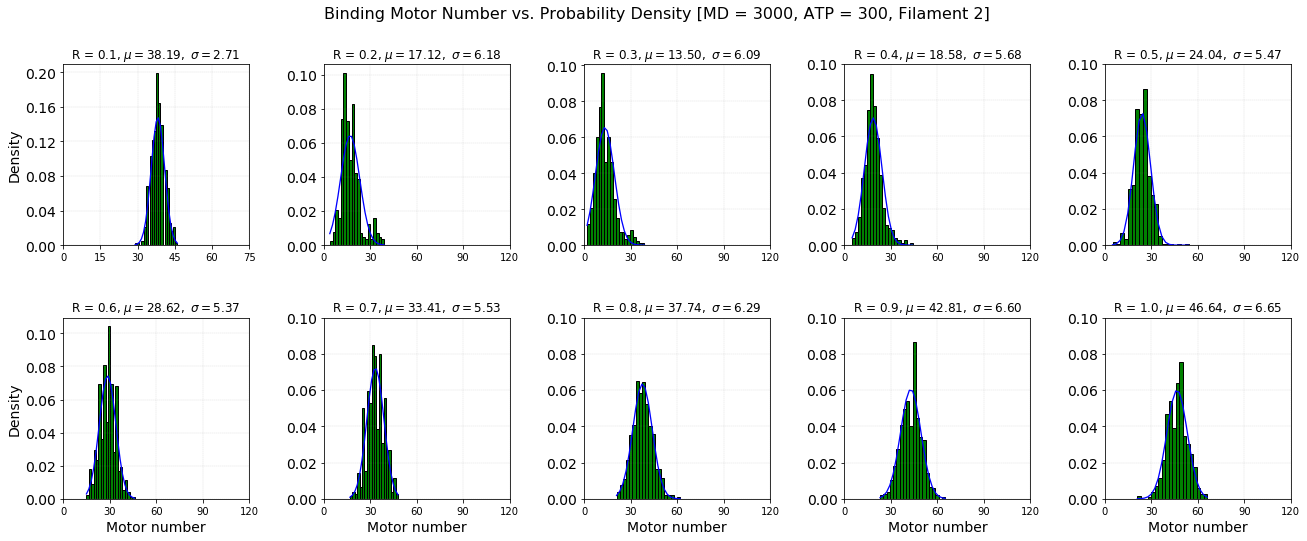

In [77]:
plt.figure(figsize=(22,8))
plt.axis('tight')
plt.suptitle('Binding Motor Number vs. Probability Density [MD = 3000, ATP = 300, Filament 2]', fontsize=16)

plt.subplots_adjust(wspace=0.4)
plt.subplots_adjust(hspace=0.4)

byn = 20; r = 0.1

for i in range(0,10):
    plt.subplot(2,5,i+1)
    (mu,sigma)=norm.fit(bm273_300[i])
    n,bins,patches = plt.hist(bm273_300[i],byn, density=True, alpha=1,histtype='bar',ec='black',color='green')
    plt.title(r'R = %.1f, $\mu=%.2f,\ \sigma=%.2f$' %(r, mu, sigma))
    plt.grid(color='gray',which='both',linestyle=':',linewidth=0.25)
    if i>0:
        plt.plot(bins,1/(sigma*np.sqrt(2*np.pi))*np.exp(-(bins-mu)**2/(2*sigma**2)),'b-',lw=1.3)
        plt.yticks(np.arange(0,0.11,step=0.02), fontsize=14)
        plt.xticks(np.arange(0,121,step=30))
    #elif i<3 and i>0:
        #plt.yticks(np.arange(0,2.1,step=0.4), fontsize=14)
        #plt.xticks(np.arange(0,31,step=5))
    elif i<1:
        plt.plot(bins,1/(sigma*np.sqrt(2*np.pi))*np.exp(-(bins-mu)**2/(2*sigma**2)),'b-',lw=1.3)
        plt.yticks(np.arange(0,0.21,step=0.04), fontsize=14)
        plt.xticks(np.arange(0,90,step=15))
    if i==0 or i==5:
        plt.ylabel('Density', fontsize=14)
    if i>4:
        plt.xlabel('Motor number', fontsize=14)
    r = r+0.1
plt.savefig('bmHist273ATP300.svg',fmt='svg',dpi=3000, bbox_inches='tight')

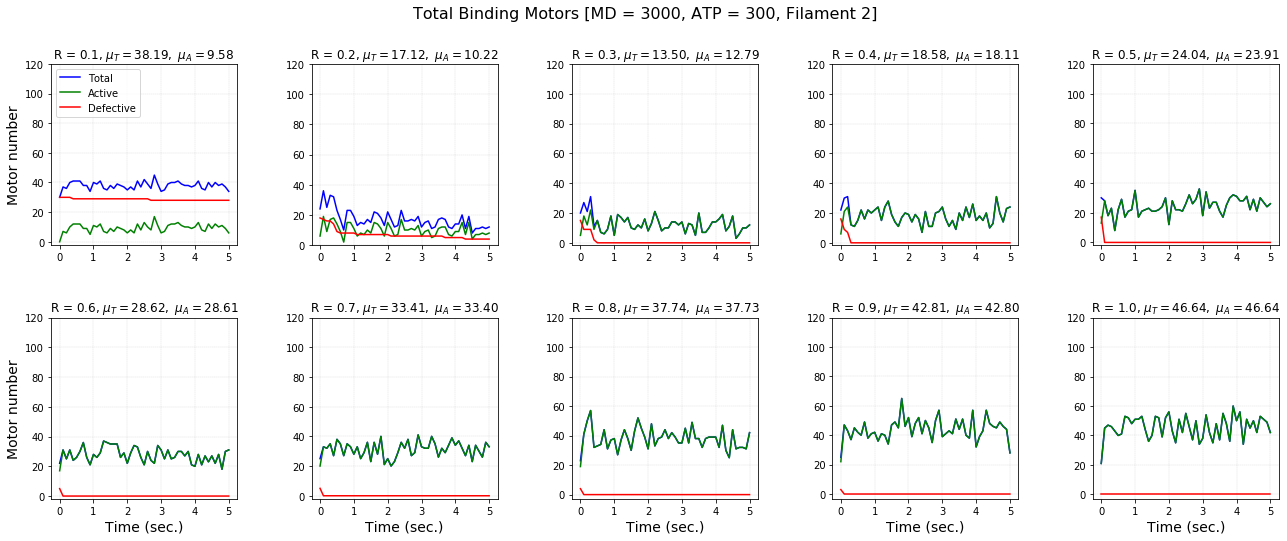

In [78]:
plt.figure(figsize=(22,8))
plt.axis('tight')
plt.suptitle('Total Binding Motors [MD = 3000, ATP = 300, Filament 2]', fontsize=16)

plt.subplots_adjust(wspace=0.4)
plt.subplots_adjust(hspace=0.4)

r = 0.1

for i in range(0,10):
    plt.subplot(2,5,i+1)
    plt.plot(simTym2[0::10],bm273_300[i][0::10], color='blue', label='Total')
    plt.plot(simTym2[0::10],bm273_300ac[i][0::10], color='green', label='Active')
    plt.plot(simTym2[0::10],(bm273_300[i][0::10] - bm273_300ac[i][0::10]), color='red', label='Defective')
    tMu = np.mean(bm273_300[i]); tSig = np.std(bm273_300[i])
    acMu = np.mean(bm273_300ac[i]); acSig = np.std(bm273_300ac[i])
    plt.title(r'R = %.1f, $\mu_T=%.2f,\ \mu_A=%.2f$' %(r, tMu, acMu))
    plt.grid(color='gray',which='both',linestyle=':',linewidth=0.25)
    plt.yticks(np.arange(0,120.1, step=20))
    if i==0:
        plt.legend(loc='upper left')
    if i==0 or i==5:
        plt.ylabel('Motor number', fontsize=14)
    if i>4:
        plt.xlabel('Time (sec.)', fontsize=14)
    r = r+0.1
plt.savefig('AllbM273ATP300.svg',fmt='svg',dpi=3000, bbox_inches='tight')

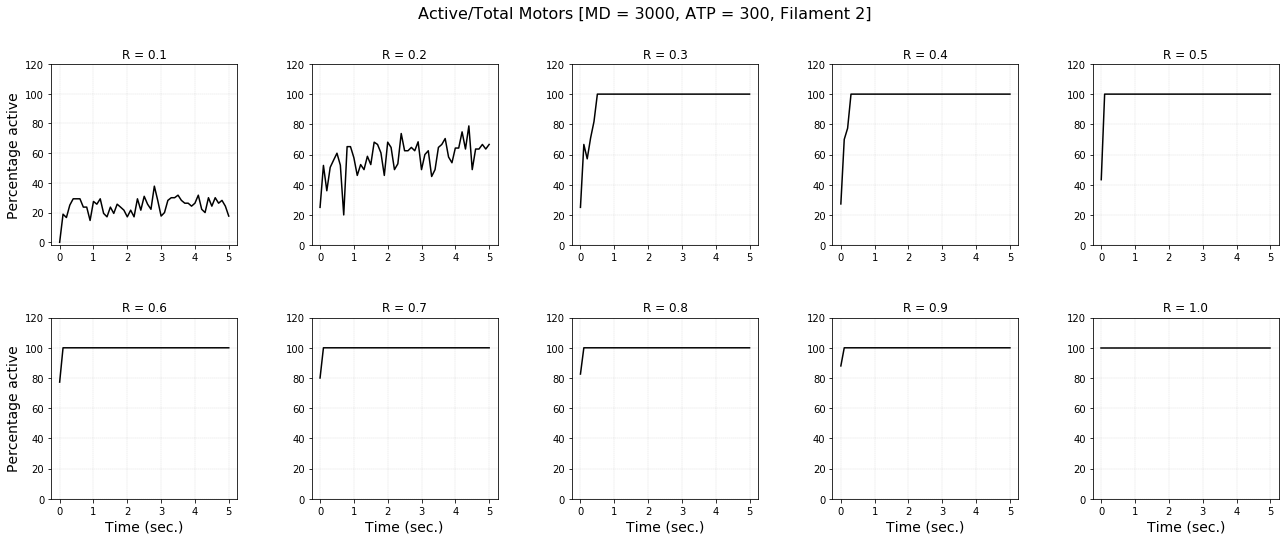

In [79]:
plt.figure(figsize=(22,8))
plt.axis('tight')
plt.suptitle('Active/Total Motors [MD = 3000, ATP = 300, Filament 2]', fontsize=16)

plt.subplots_adjust(wspace=0.4)
plt.subplots_adjust(hspace=0.4)

r = 0.1

for i in range(0,10):
    plt.subplot(2,5,i+1)
    plt.plot(simTym2[0::10],(bm273_300ac[i][0::10]/bm273_300[i][0::10])*100, color='black')
    plt.title('R = %.1f' %(r))
    plt.grid(color='gray',which='both',linestyle=':',linewidth=0.25)
    plt.yticks(np.arange(0,120.1, step=20))
    if i==0 or i==5:
        plt.ylabel('Percentage active', fontsize=14)
    if i>4:
        plt.xlabel('Time (sec.)', fontsize=14)
    r = r+0.1
plt.savefig('FracBM273ATP300.svg',fmt='svg',dpi=3000, bbox_inches='tight')

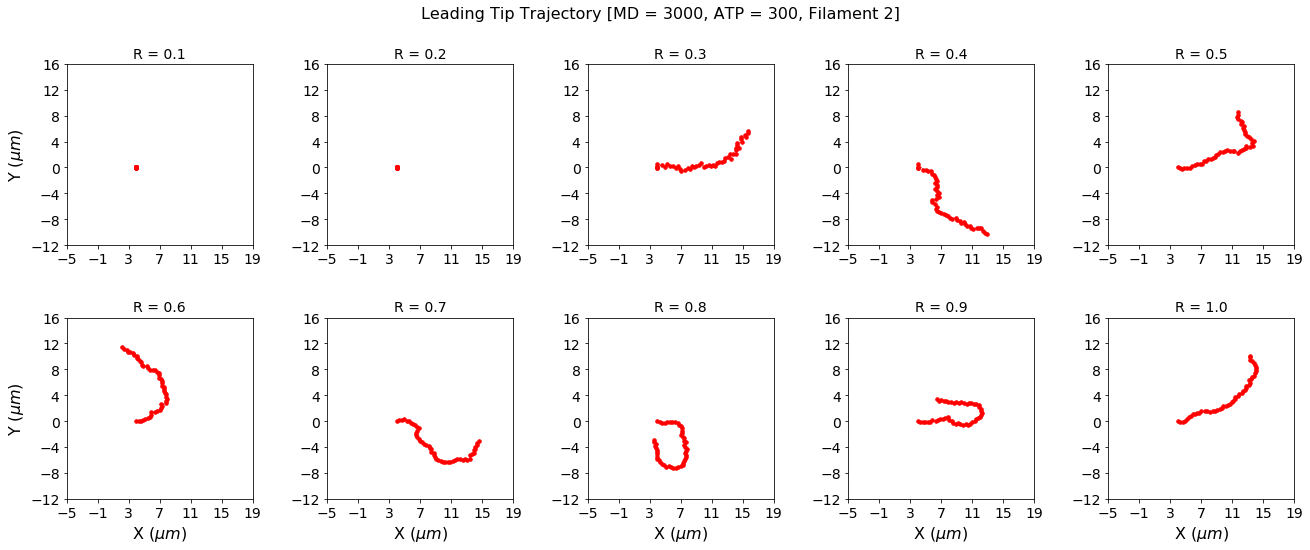

In [80]:
plt.figure(figsize=(22,8))
plt.suptitle('Leading Tip Trajectory [MD = 3000, ATP = 300, Filament 2]', fontsize=16)
plt.subplots_adjust(wspace=0.4)
plt.subplots_adjust(hspace=0.4)
plt.axes().set_aspect('equal')

r = 0.1

for i in range(0,10):
    plt.subplot(2,5,i+1)
    plt.plot(AF273_300[i]['x'],AF273_300[i]['y'], label='Leading tip', color='red', marker='.', linestyle='-', linewidth=0.5, markersize=7)
    plt.xticks(np.arange(-5,22,step=4),fontsize=14)
    plt.yticks(np.arange(-12,17,step=4),fontsize=14)
    plt.title('R = %.1f'%(r), fontsize=14)
    if i==0 or i==5:
        plt.ylabel('Y ($\mu m$)', fontsize=16)
    if i>4:
        plt.xlabel('X ($\mu m$)', fontsize=16)
    r = r+0.1
plt.savefig('traj273ATP300.svg',fmt='svg',dpi=3000, bbox_inches='tight')

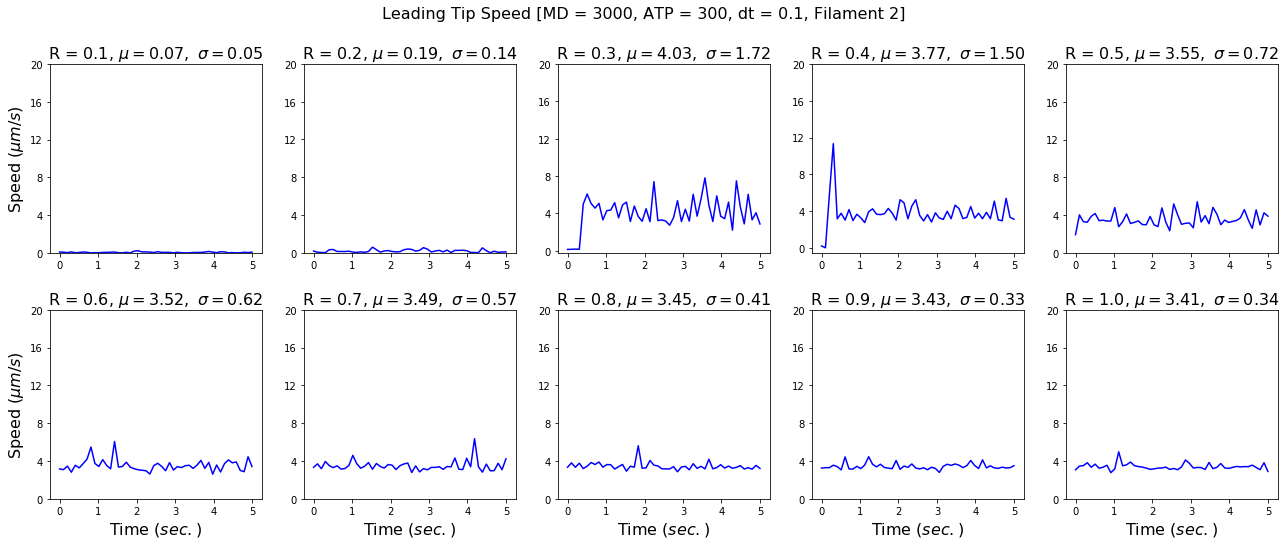

In [81]:
Dt = 0.01
r = 0.1

plt.figure(figsize=(22,8))
plt.suptitle('Leading Tip Speed [MD = 3000, ATP = 300, dt = 0.1, Filament 2]', fontsize=16)
plt.subplots_adjust(hspace=0.3)

for i in range(0,10):
    plt.subplot(2,5,i+1)
    dfVel = AF273_300a[i].iloc[0::10, :] #pick every 9th row starting from the first (0): dt = 0.1
    Dx_tip = np.diff(dfVel['x']); Dy_tip = np.diff(dfVel['y'])
    DD=np.sqrt((Dx_tip**2)+(Dy_tip**2))
    v=DD/(10*Dt) # use 10*Dt if you .iloc...
    
    avSpd = np.mean(v)
    stDev=np.sum(((v-avSpd)**2)/(np.size(v)-1)); stDev=np.sqrt(stDev)
    
    plt.plot(simTym,v, color='blue')
    plt.title(r'R = %.1f, $\mu=%.2f,\ \sigma=%.2f$' %(r, avSpd, stDev), fontsize=16)
    
    if i==0 or i==5:
        plt.ylabel('Speed ($\mu m/s$)', fontsize=16)
    if i>4:
        plt.xlabel('Time ($ sec. $)', fontsize=16)
    plt.yticks(np.arange(0,20.1, step=4))
    #plt.tick_params(labelsize=14)
    r += 0.1
plt.savefig('iSpd273ATP300.svg',fmt='svg',dpi=3000, bbox_inches='tight')
